# **Source**

### **Source:** https://colab.research.google.com/drive/1b3CUJuDOmPmNdZFH3LQDmt5F0K3FZhqD?usp=sharing#scrollTo=Db8BJQONjbAT

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
# Set random seed for NumPy
np.random.seed(313)

# Set random seed for TensorFlow
tf.random.set_seed(313)

# **Data Processing for BS_0**

**Remove '[' and ']' characters from the CSV file**

In [ ]:
import csv

with open('df_0_user_path.csv', 'r', newline='') as infile, open('df_0_user_path_cleanbracket.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        cleaned_row = [cell.replace('[', '').replace(']', '') for cell in row]
        writer.writerow(cleaned_row)

In [ ]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('df_0_user_path_cleanbracket.csv')

# we dont need active_paths. No value in this column. Drop the 'active_paths' column
if 'active_paths' in df.columns:
    df.drop(columns=['active_paths'], inplace=True)
    print("'active_paths' column removed.")
else:
    print("Column 'active_paths' not found in the CSV file. No action taken.")

# Rename the first column to 'seq_num'
df.rename(columns={df.columns[0]: 'seq_num'}, inplace=True)

#write df to csv file
df.to_csv('df_0_user_path_cleanbracket.csv', index=False)

'active_paths' column removed.


In [ ]:
df

,seq_num,num_paths,DoD_phi,DoD_theta,DoA_phi,DoA_theta,phase,ToA,power
0,0,1,126.8170,85.1430,53.7035,94.8570,139.22600,1.339900e-06,8.474237e-15
1,1,1,126.7240,85.1372,53.7971,94.8628,-60.95080,1.338310e-06,8.046362e-15
2,2,1,126.6300,85.1314,53.8909,94.8686,-156.11000,1.336720e-06,6.061783e-15
3,3,1,126.5360,85.1256,53.9850,94.8744,-145.09700,1.335130e-06,3.577663e-15
4,4,1,126.4420,85.1198,54.0792,94.8802,-21.83270,1.333550e-06,1.618825e-15
...,...,...,...,...,...,...,...,...,...
269819,269819,1,-21.9837,80.3775,158.0160,99.6225,3.23024,7.266050e-07,2.435564e-13
269820,269820,1,-21.9031,80.4104,158.0970,99.5896,-125.67600,7.290770e-07,2.417686e-13
269821,269821,1,-21.8230,80.4431,158.1770,99.5569,-12.20370,7.315500e-07,2.399387e-13
269822,269822,1,-21.7435,80.4757,158.2570,99.5243,-15.16410,7.340250e-07,2.381769e-13


**scikit learn data imputation: Not using**

In [ ]:
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Assuming you have your data in a pandas DataFrame called 'df'
# # Replace 'None' values with NaN
# df.replace('None', np.nan, inplace=True)

# # Initialize the imputer
# imputer = SimpleImputer(strategy='mean')

# # Fit and transform the data to replace NaN values with mean
# df_imputed = imputer.fit_transform(df)

# # Convert the imputed data back to a DataFrame
# df_imputed = pd.DataFrame(df_imputed, columns=df.columns, index=df.index)

# # Now 'df_imputed' contains the imputed data
# # If you want to replace the original 'df' with 'df_imputed'
# df_imputed

**Fill the num_path=0 rows to previous 10 rows average: NOT USING**

In [ ]:
# import pandas as pd

# input_file = 'df_0_user_path_cleanbracket.csv'   # Replace 'input.csv' with the name of your input CSV file
# output_file = 'bs_0_user_path.csv'  # Replace 'output.csv' with the name of the new CSV file to be created

# # Function to average the current row with the previous 50 rows (excluding the first and second columns)
# def average_previous_rows(df, row_index, num_rows=10):
#     start_index = max(0, row_index - num_rows)
#     end_index = row_index
#     return df.iloc[start_index:end_index, 2:].mean()

# try:
#     # Read the CSV file into a pandas DataFrame
#     df = pd.read_csv(input_file)

#     # Iterate through the DataFrame and check for 'num_paths' equal to 0
#     for index, row in df.iterrows():
#         if row['num_paths'] == 0:
#             avg_row = average_previous_rows(df, index, num_rows=10)
#             df.iloc[index, 2:] = avg_row

#     # Write the updated DataFrame to a new CSV file
#     df.to_csv(output_file, index=False)

#     print("Data processed and saved to bs_0_user_path.csv.")

# except FileNotFoundError:
#     print(f"Error: File '{input_file}' not found.")
# except Exception as e:
#     print(f"An error occurred: {e}")


Data processed and saved to bs_0_user_path.csv.


In [ ]:
# # Drop the 'num_paths' column
# if 'num_paths' in df.columns:
#     df.drop(columns=['num_paths'], inplace=True)
#     print("'num_paths' column removed.")
# else:
#     print("Column 'num_paths' not found in the CSV file. No action taken.")

# # Write the updated DataFrame to a new CSV file
# df.to_csv(output_file, index=False)

'num_paths' column removed.


##**Replace rows with num_path=0 to 0**

In [ ]:
import pandas as pd

input_file = 'df_0_user_path_cleanbracket.csv'   # Replace 'input.csv' with the name of your input CSV file
output_file = 'bs_0_path.csv'  # Replace 'output.csv' with the name of the new CSV file to be created

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(input_file)

# Rename the first column to 'seq_num'
df.rename(columns={df.columns[0]: 'seq_num'}, inplace=True)

# Drop the 'active_paths' column
if 'active_paths' in df.columns:
    df.drop(columns=['active_paths'], inplace=True)
    print("'active_paths' column removed.")
else:
    print("Column 'active_paths' not found in the CSV file. No action taken.")

# Apply the condition: if num_paths is 0, set all values to 0 (except the first column)
if 'num_paths' in df.columns:
  df.loc[df['num_paths'] == 0, df.columns[1:]] = 0
else:
  print("Column 'num_paths' not found in the CSV file. No action taken.")

# Save the modified data to a new CSV file
df.to_csv(output_file, index=False)

print("Modified data saved to bs_to_user_path.csv.")

Column 'active_paths' not found in the CSV file. No action taken.
Modified data saved to bs_to_user_path.csv.


In [ ]:
df

# **Data Processing BS_1: RIS**

**Brackets removing**

In [ ]:
import csv

with open('df_1_user_path.csv', 'r', newline='') as infile, open('df_1_user_path_cleanbracket.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        cleaned_row = [cell.replace('[', '').replace(']', '') for cell in row]
        writer.writerow(cleaned_row)

In [ ]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('df_1_user_path_cleanbracket.csv')

# Rename the first column to 'seq_num'
df.rename(columns={df.columns[0]: 'seq_num'}, inplace=True)

# Drop the 'active_paths' column
if 'active_paths' in df.columns:
    df.drop(columns=['active_paths'], inplace=True)
    print("'active_paths' column removed.")
else:
    print("Column 'active_paths' not found in the CSV file. No action taken.")

# Drop the 'num_paths' column
if 'num_paths' in df.columns:
    df.drop(columns=['num_paths'], inplace=True)
    print("'num_paths' column removed.")
else:
    print("Column 'num_paths' not found in the CSV file. No action taken.")

# Rename the first column to 'seq_num'
df.rename(columns={df.columns[0]: 'seq_num'}, inplace=True)

#write df to csv file
df.to_csv('bs_1_user_path.csv', index=False)

Column 'active_paths' not found in the CSV file. No action taken.
'num_paths' column removed.


#**Manually combine & Load csv files**

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

# Set random seed for NumPy
np.random.seed(313)

# Set random seed for TensorFlow
tf.random.set_seed(313)

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('combined_data_zeros.csv')
df = df[:10000]
df

,seq_num,num_paths_bs,DoD_phi_bs,DoD_theta_bs,DoA_phi_bs,DoA_theta_bs,phase_bs,ToA_bs,power_bs,DoD_phi,...,DoA_phi,DoA_theta,phase,ToA,power,x,y,z,LoS_bs,LoS
0,0,1,126.817,85.1430,53.7035,94.8570,139.2260,0.000001,8.470000e-15,-133.532,...,46.4683,83.3833,17.80990,1.160000e-06,8.470000e-14,0.000000,400.000000,40.0,0,1
1,1,1,126.724,85.1372,53.7971,94.8628,-60.9508,0.000001,8.050000e-15,-133.434,...,46.5660,83.3727,-165.60900,1.160000e-06,8.500000e-14,0.810000,400.000000,40.0,0,1
2,2,1,126.630,85.1314,53.8909,94.8686,-156.1100,0.000001,6.060000e-15,-133.336,...,46.6641,83.3621,128.29000,1.150000e-06,8.530000e-14,1.620000,400.000000,40.0,0,1
3,3,1,126.536,85.1256,53.9850,94.8744,-145.0970,0.000001,3.580000e-15,-133.238,...,46.7624,83.3514,178.34400,1.150000e-06,8.560000e-14,2.430000,400.000000,40.0,0,1
4,4,1,126.442,85.1198,54.0792,94.8802,-21.8327,0.000001,1.620000e-15,-133.139,...,46.8611,83.3408,-16.61790,1.150000e-06,8.600000e-14,3.240000,400.000000,40.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0.000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000e+00,-107.244,...,72.7557,80.7829,-139.61700,8.330000e-07,1.800000e-13,164.429993,414.579987,40.0,-1,1
9996,9996,0,0.000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000e+00,-107.064,...,72.9357,80.7741,-5.48307,8.320000e-07,1.800000e-13,165.240005,414.579987,40.0,-1,1
9997,9997,0,0.000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000e+00,-106.884,...,73.1160,80.7654,-90.13110,8.320000e-07,1.800000e-13,166.050003,414.579987,40.0,-1,1
9998,9998,0,0.000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000e+00,-106.703,...,73.2967,80.7567,-35.18910,8.310000e-07,1.810000e-13,166.860001,414.579987,40.0,-1,1


In [ ]:
# df.drop(columns=['num_paths_bs'], inplace=True)
# df.drop(columns=['z'], inplace=True)
# df.drop(columns=['LoS'], inplace=True)
# df.shape

**Scaling whole dataset, so before splitting X, y**

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler = scaler.fit(df)
# df_for_training_scaled = scaler.transform(df)

# # Convert the scaled numpy array to a DataFrame
# df_for_training_scaled = pd.DataFrame(df_for_training_scaled, columns=df.columns)
# df_for_training_scaled

**Converting to X and y**

**selecting all y**

In [ ]:
def df_to_X_y(df, window_size=10):

  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

**selecting y[range]**

In [ ]:
# def df_to_X_y(df, window_size=10):

#   df_as_np = df.to_numpy()
#   X = []
#   y = []
#   for i in range(len(df_as_np)-window_size):
#     row = [r for r in df_as_np[i:i+window_size]]
#     X.append(row)
#     label = df_as_np[i+window_size, 2:]
#     y.append(label)
#   return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 10
X, y = df_to_X_y(df, WINDOW_SIZE)
X.shape, y.shape

((9990, 10, 21), (9990, 21))

**Data Splitting**

**validation data set creating manually**

In [ ]:
# Step 1: Split the data into training and test sets
split_ratio = int(len(X) * 0.8)  # 80% of the data for training, 20% for testing

X_train_val, X_test = X[:split_ratio], X[split_ratio:]
y_train_val, y_test = y[:split_ratio], y[split_ratio:]

# Step 2: Further split the training data into training and validation sets
val_split_ratio = int(len(X_train_val) * 0.8)  # 20% of the training data for validation

X_train, X_val = X_train_val[:val_split_ratio], X_train_val[val_split_ratio:]
y_train, y_val = y_train_val[:val_split_ratio], y_train_val[val_split_ratio:]

# Step 3: Check the sizes of each subset
print("Training set: X_train shape =", X_train.shape, "y_train shape =", y_train.shape)
print("Validation set: X_val shape =", X_val.shape, "y_val shape =", y_val.shape)
print("Test set: X_test shape =", X_test.shape, "y_test shape =", y_test.shape)


Training set: X_train shape = (6393, 10, 21) y_train shape = (6393, 21)
Validation set: X_val shape = (1599, 10, 21) y_val shape = (1599, 21)
Test set: X_test shape = (1998, 10, 21) y_test shape = (1998, 21)


In [ ]:
# # Step 1: Split the data into training and test sets
# split_ratio = int(len(X) * 0.8)  # 80% of the data for training, 20% for testing

# X_train, X_test = X[:split_ratio], X[split_ratio:]
# y_train, y_test = y[:split_ratio], y[split_ratio:]

# # Step 3: Check the sizes of each subset
# print("Training set: X_train shape =", X_train.shape, "y_train shape =", y_train.shape)
# print("Test set: X_test shape =", X_test.shape, "y_test shape =", y_test.shape)


**scikit-learn train, test**

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=313)

# Step 2: Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=313)

# Step 3: Check the sizes of each subset
print("Training set: X_train shape =", X_train.shape, "y_train shape =", y_train.shape)
print("Validation set: X_val shape =", X_val.shape, "y_val shape =", y_val.shape)
print("Test set: X_test shape =", X_test.shape, "y_test shape =", y_test.shape)

**(Doesn't perform good)scaling & transformtion only to X dataset**

In [ ]:
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# # Reshape the 3D data to 2D arrays
# X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
# X_val_reshaped = X_val.reshape(-1, X_val.shape[-1])
# X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler on the reshaped training data
# scaler.fit(X_train_reshaped)

# # Transform the reshaped training and test data
# X_train_scaled_reshaped = scaler.transform(X_train_reshaped)
# X_val_scaled_reshaped = scaler.transform(X_val_reshaped)
# X_test_scaled_reshaped = scaler.transform(X_test_reshaped)

# # Reshape the scaled data back to 3D arrays
# X_train_scaled = X_train_scaled_reshaped.reshape(X_train.shape)
# X_val_scaled = X_val_scaled_reshaped.reshape(X_val.shape)
# X_test_scaled = X_test_scaled_reshaped.reshape(X_test.shape)

**minmaxscaler()**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Reshape the 3D data to 2D arrays
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_val_reshaped = X_val.reshape(-1, X_val.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the reshaped training data
scaler.fit(X_train_reshaped)

# Transform the reshaped training and test data
X_train_scaled_reshaped = scaler.transform(X_train_reshaped)
X_val_scaled_reshaped = scaler.transform(X_val_reshaped)
X_test_scaled_reshaped = scaler.transform(X_test_reshaped)

# Reshape the scaled data back to 3D arrays
X_train_scaled = X_train_scaled_reshaped.reshape(X_train.shape)
X_val_scaled = X_val_scaled_reshaped.reshape(X_val.shape)
X_test_scaled = X_test_scaled_reshaped.reshape(X_test.shape)

In [ ]:
X_train_scaled.shape, X_test_scaled.shape, X_val_scaled.shape

((6393, 10, 21), (1998, 10, 21), (1599, 10, 21))

In [ ]:
# X_train.shape, X_val.shape, X_test.shape

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((6393, 21), (1599, 21), (1998, 21))

**Scikit learn's train_test splitting**

In [ ]:
# df = pd.read_csv('path_test 5.csv')
# df

In [ ]:
# path_pow = df['DoD_theta']
# path_pow.plot()

#**Previous**

**Previous Converting to X an y**

In [ ]:
def df_to_X_y(df, column_name, window_size=10):
  # Get the column number from the string
  column_number = df.columns.get_loc(column_name)

  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][column_number]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 10
X, y = df_to_X_y(df, 'DoA_phi', WINDOW_SIZE)
X.shape, y.shape

**Previous Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=313)

# Step 2: Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=313)

# Step 3: Check the sizes of each subset
print("Training set: X_train shape =", X_train.shape, "y_train shape =", y_train.shape)
print("Validation set: X_val shape =", X_val.shape, "y_val shape =", y_val.shape)
print("Test set: X_test shape =", X_test.shape, "y_test shape =", y_test.shape)

Training set: X_train shape = (6662, 10, 13) y_train shape = (6662,)
Validation set: X_val shape = (1666, 10, 13) y_val shape = (1666,)
Test set: X_test shape = (2082, 10, 13) y_test shape = (2082,)


**Previous Scaling & Transforming**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape the 3D data to 2D arrays
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_val_reshaped = X_val.reshape(-1, X_val.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the reshaped training data
scaler.fit(X_train_reshaped)

# Transform the reshaped training and test data
X_train_scaled_reshaped = scaler.transform(X_train_reshaped)
X_val_scaled_reshaped = scaler.transform(X_val_reshaped)
X_test_scaled_reshaped = scaler.transform(X_test_reshaped)

# Reshape the scaled data back to 3D arrays
X_train_scaled = X_train_scaled_reshaped.reshape(X_train.shape)
X_val_scaled = X_val_scaled_reshaped.reshape(X_val.shape)
X_test_scaled = X_test_scaled_reshaped.reshape(X_test.shape)

In [ ]:
X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape

In [ ]:
y_train.shape, y_val.shape, y_test.shape

# **3 Models Building**

## **LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.optimizers import Adam

lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(WINDOW_SIZE, 21)))  # LSTM layer with 32 units
lstm_model.add(Dropout(0.2))  # Adding Dropout layer with rate 0.2
#lstm_model.add(LSTM(32))  # Additional LSTM layer
#lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(21, activation='linear'))  # Output layer with 14 units, as y has 14 features

lstm_model.summary()

KeyboardInterrupt: 

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

lstm_model = Sequential()
lstm_model.add(LSTM(units=32, input_shape=(WINDOW_SIZE, 21)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(16, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(21, activation='linear'))
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                6912      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 21)                357       
                                                                 
Total params: 7,797
Trainable params: 7,797
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint1 = ModelCheckpoint('LSTM_model/', save_best_only=True)
lstm_model.compile(loss=MeanSquaredError(),
                   optimizer=Adam(learning_rate=0.001),
                   metrics=[RootMeanSquaredError()])

In [ ]:
#using X_train_scaled, X_val_scaled
lstm_history = lstm_model.fit(X_train_scaled, y_train,
                              validation_data=(X_val_scaled, y_val),
                              #validation_split=0.2,
                              epochs=200,
                              batch_size=32,
                              callbacks=[checkpoint1])

Epoch 1/200
199/200 [============================>.] - ETA: 0s - loss: 1595056.6250 - root_mean_squared_error: 1262.9553

200/200 [==============================] - 11s 42ms/step - loss: 1596153.3750 - root_mean_squared_error: 1263.3894 - val_loss: 1617364.0000 - val_root_mean_squared_error: 1271.7563
Epoch 2/200
198/200 [============================>.] - ETA: 0s - loss: 1565237.0000 - root_mean_squared_error: 1251.0946

200/200 [==============================] - 6s 32ms/step - loss: 1565294.1250 - root_mean_squared_error: 1251.1174 - val_loss: 1571178.1250 - val_root_mean_squared_error: 1253.4663
Epoch 3/200
194/200 [============================>.] - ETA: 0s - loss: 1508423.3750 - root_mean_squared_error: 1228.1790

200/200 [==============================] - 7s 37ms/step - loss: 1505830.6250 - root_mean_squared_error: 1227.1229 - val_loss: 1498662.8750 - val_root_mean_squared_error: 1224.1989
Epoch 4/200
196/200 [============================>.] - ETA: 0s - loss: 1429362.2500 - root_mean_squared_error: 1195.5594

200/200 [==============================] - 7s 33ms/step - loss: 1426204.3750 - root_mean_squared_error: 1194.2379 - val_loss: 1409533.8750 - val_root_mean_squared_error: 1187.2380
Epoch 5/200
196/200 [============================>.] - ETA: 0s - loss: 1328568.6250 - root_mean_squared_error: 1152.6355

200/200 [==============================] - 7s 36ms/step - loss: 1332022.3750 - root_mean_squared_error: 1154.1328 - val_loss: 1308239.8750 - val_root_mean_squared_error: 1143.7831
Epoch 6/200
196/200 [============================>.] - ETA: 0s - loss: 1228194.0000 - root_mean_squared_error: 1108.2394

200/200 [==============================] - 7s 34ms/step - loss: 1227433.7500 - root_mean_squared_error: 1107.8964 - val_loss: 1198320.1250 - val_root_mean_squared_error: 1094.6781
Epoch 7/200
200/200 [==============================] - ETA: 0s - loss: 1121178.1250 - root_mean_squared_error: 1058.8568

200/200 [==============================] - 9s 46ms/step - loss: 1121178.1250 - root_mean_squared_error: 1058.8568 - val_loss: 1085315.7500 - val_root_mean_squared_error: 1041.7849
Epoch 8/200
196/200 [============================>.] - ETA: 0s - loss: 1011881.5625 - root_mean_squared_error: 1005.9231

200/200 [==============================] - 7s 33ms/step - loss: 1013277.0625 - root_mean_squared_error: 1006.6166 - val_loss: 973203.0625 - val_root_mean_squared_error: 986.5104
Epoch 9/200
197/200 [============================>.] - ETA: 0s - loss: 908965.6250 - root_mean_squared_error: 953.3970

200/200 [==============================] - 7s 36ms/step - loss: 907820.4375 - root_mean_squared_error: 952.7963 - val_loss: 866734.1250 - val_root_mean_squared_error: 930.9857
Epoch 10/200
194/200 [============================>.] - ETA: 0s - loss: 804820.8125 - root_mean_squared_error: 897.1182

200/200 [==============================] - 7s 33ms/step - loss: 804107.5625 - root_mean_squared_error: 896.7206 - val_loss: 768670.3125 - val_root_mean_squared_error: 876.7384
Epoch 11/200
199/200 [============================>.] - ETA: 0s - loss: 725116.3750 - root_mean_squared_error: 851.5377

200/200 [==============================] - 7s 36ms/step - loss: 725324.8750 - root_mean_squared_error: 851.6600 - val_loss: 682668.9375 - val_root_mean_squared_error: 826.2378
Epoch 12/200
198/200 [============================>.] - ETA: 0s - loss: 645599.9375 - root_mean_squared_error: 803.4924

200/200 [==============================] - 7s 33ms/step - loss: 646426.6875 - root_mean_squared_error: 804.0067 - val_loss: 609241.5000 - val_root_mean_squared_error: 780.5392
Epoch 13/200
200/200 [==============================] - ETA: 0s - loss: 589237.0625 - root_mean_squared_error: 767.6176

200/200 [==============================] - 7s 36ms/step - loss: 589237.0625 - root_mean_squared_error: 767.6176 - val_loss: 548752.7500 - val_root_mean_squared_error: 740.7784
Epoch 14/200
199/200 [============================>.] - ETA: 0s - loss: 542461.2500 - root_mean_squared_error: 736.5195

200/200 [==============================] - 6s 30ms/step - loss: 541461.0000 - root_mean_squared_error: 735.8402 - val_loss: 501406.3125 - val_root_mean_squared_error: 708.1005
Epoch 15/200
197/200 [============================>.] - ETA: 0s - loss: 473982.2188 - root_mean_squared_error: 688.4636

200/200 [==============================] - 8s 39ms/step - loss: 472801.5938 - root_mean_squared_error: 687.6057 - val_loss: 374629.9688 - val_root_mean_squared_error: 612.0702
Epoch 16/200
193/200 [===========================>..] - ETA: 0s - loss: 350507.5938 - root_mean_squared_error: 592.0368

200/200 [==============================] - 6s 32ms/step - loss: 349792.8750 - root_mean_squared_error: 591.4329 - val_loss: 290073.0000 - val_root_mean_squared_error: 538.5842
Epoch 17/200
197/200 [============================>.] - ETA: 0s - loss: 272822.9375 - root_mean_squared_error: 522.3246

200/200 [==============================] - 7s 36ms/step - loss: 272844.6562 - root_mean_squared_error: 522.3454 - val_loss: 214490.6094 - val_root_mean_squared_error: 463.1313
Epoch 18/200
193/200 [===========================>..] - ETA: 0s - loss: 215087.6719 - root_mean_squared_error: 463.7754

200/200 [==============================] - 6s 30ms/step - loss: 214365.8750 - root_mean_squared_error: 462.9966 - val_loss: 156769.1250 - val_root_mean_squared_error: 395.9408
Epoch 19/200
193/200 [===========================>..] - ETA: 0s - loss: 168555.1562 - root_mean_squared_error: 410.5548

200/200 [==============================] - 8s 39ms/step - loss: 167971.5625 - root_mean_squared_error: 409.8435 - val_loss: 111704.2891 - val_root_mean_squared_error: 334.2219
Epoch 20/200
199/200 [============================>.] - ETA: 0s - loss: 130722.7031 - root_mean_squared_error: 361.5559

200/200 [==============================] - 6s 33ms/step - loss: 130410.2734 - root_mean_squared_error: 361.1236 - val_loss: 78587.1094 - val_root_mean_squared_error: 280.3339
Epoch 21/200
195/200 [============================>.] - ETA: 0s - loss: 104856.0000 - root_mean_squared_error: 323.8147

200/200 [==============================] - 7s 35ms/step - loss: 104767.4375 - root_mean_squared_error: 323.6779 - val_loss: 59534.2227 - val_root_mean_squared_error: 243.9964
Epoch 22/200
195/200 [============================>.] - ETA: 0s - loss: 89665.2109 - root_mean_squared_error: 299.4415

200/200 [==============================] - 7s 34ms/step - loss: 89537.2109 - root_mean_squared_error: 299.2277 - val_loss: 40251.3828 - val_root_mean_squared_error: 200.6275
Epoch 23/200
197/200 [============================>.] - ETA: 0s - loss: 75891.7734 - root_mean_squared_error: 275.4846

200/200 [==============================] - 7s 35ms/step - loss: 75629.2578 - root_mean_squared_error: 275.0078 - val_loss: 30663.0703 - val_root_mean_squared_error: 175.1087
Epoch 24/200
195/200 [============================>.] - ETA: 0s - loss: 70662.8516 - root_mean_squared_error: 265.8248

200/200 [==============================] - 7s 35ms/step - loss: 70620.3125 - root_mean_squared_error: 265.7448 - val_loss: 22462.6133 - val_root_mean_squared_error: 149.8754
Epoch 25/200
195/200 [============================>.] - ETA: 0s - loss: 62813.8672 - root_mean_squared_error: 250.6270

200/200 [==============================] - 7s 34ms/step - loss: 62778.3438 - root_mean_squared_error: 250.5561 - val_loss: 18371.1699 - val_root_mean_squared_error: 135.5403
Epoch 26/200
200/200 [==============================] - 2s 12ms/step - loss: 59875.1289 - root_mean_squared_error: 244.6940 - val_loss: 19511.6582 - val_root_mean_squared_error: 139.6841
Epoch 27/200
199/200 [============================>.] - ETA: 0s - loss: 57722.6719 - root_mean_squared_error: 240.2554

200/200 [==============================] - 6s 29ms/step - loss: 57677.6094 - root_mean_squared_error: 240.1616 - val_loss: 13240.1504 - val_root_mean_squared_error: 115.0658
Epoch 28/200
193/200 [===========================>..] - ETA: 0s - loss: 54051.2383 - root_mean_squared_error: 232.4892

200/200 [==============================] - 8s 40ms/step - loss: 55014.7930 - root_mean_squared_error: 234.5523 - val_loss: 12216.1787 - val_root_mean_squared_error: 110.5268
Epoch 29/200
198/200 [============================>.] - ETA: 0s - loss: 52432.7734 - root_mean_squared_error: 228.9820

200/200 [==============================] - 6s 30ms/step - loss: 52333.0742 - root_mean_squared_error: 228.7642 - val_loss: 9323.9297 - val_root_mean_squared_error: 96.5605
Epoch 30/200
200/200 [==============================] - 2s 8ms/step - loss: 50914.8516 - root_mean_squared_error: 225.6432 - val_loss: 13087.1787 - val_root_mean_squared_error: 114.3992
Epoch 31/200
194/200 [============================>.] - ETA: 0s - loss: 51625.9414 - root_mean_squared_error: 227.2135

200/200 [==============================] - 8s 38ms/step - loss: 52110.8906 - root_mean_squared_error: 228.2781 - val_loss: 7629.8169 - val_root_mean_squared_error: 87.3488
Epoch 32/200
194/200 [============================>.] - ETA: 0s - loss: 49965.0430 - root_mean_squared_error: 223.5286

200/200 [==============================] - 6s 32ms/step - loss: 49801.2539 - root_mean_squared_error: 223.1619 - val_loss: 6961.4941 - val_root_mean_squared_error: 83.4356
Epoch 33/200
193/200 [===========================>..] - ETA: 0s - loss: 48746.2891 - root_mean_squared_error: 220.7856

200/200 [==============================] - 7s 36ms/step - loss: 48760.1445 - root_mean_squared_error: 220.8170 - val_loss: 6869.1738 - val_root_mean_squared_error: 82.8805
Epoch 34/200
200/200 [==============================] - 2s 8ms/step - loss: 49064.7812 - root_mean_squared_error: 221.5057 - val_loss: 10848.5742 - val_root_mean_squared_error: 104.1565
Epoch 35/200
198/200 [============================>.] - ETA: 0s - loss: 47410.4258 - root_mean_squared_error: 217.7393

200/200 [==============================] - 7s 33ms/step - loss: 47448.8906 - root_mean_squared_error: 217.8276 - val_loss: 6679.5874 - val_root_mean_squared_error: 81.7287
Epoch 36/200
200/200 [==============================] - 2s 9ms/step - loss: 46953.6719 - root_mean_squared_error: 216.6879 - val_loss: 7382.9756 - val_root_mean_squared_error: 85.9242
Epoch 37/200
196/200 [============================>.] - ETA: 0s - loss: 46547.4648 - root_mean_squared_error: 215.7486

200/200 [==============================] - 7s 36ms/step - loss: 46555.5547 - root_mean_squared_error: 215.7673 - val_loss: 5601.8442 - val_root_mean_squared_error: 74.8455
Epoch 38/200
200/200 [==============================] - 2s 8ms/step - loss: 46684.8906 - root_mean_squared_error: 216.0669 - val_loss: 5985.3638 - val_root_mean_squared_error: 77.3651
Epoch 39/200
200/200 [==============================] - 1s 7ms/step - loss: 47192.8438 - root_mean_squared_error: 217.2391 - val_loss: 10844.7314 - val_root_mean_squared_error: 104.1380
Epoch 40/200
200/200 [==============================] - 1s 7ms/step - loss: 44757.9141 - root_mean_squared_error: 211.5607 - val_loss: 7068.0615 - val_root_mean_squared_error: 84.0718
Epoch 41/200
196/200 [============================>.] - ETA: 0s - loss: 45647.5195 - root_mean_squared_error: 213.6528

200/200 [==============================] - 7s 36ms/step - loss: 45702.8594 - root_mean_squared_error: 213.7823 - val_loss: 5540.4819 - val_root_mean_squared_error: 74.4344
Epoch 42/200
200/200 [==============================] - 2s 8ms/step - loss: 49263.9570 - root_mean_squared_error: 221.9548 - val_loss: 6872.6816 - val_root_mean_squared_error: 82.9016
Epoch 43/200
200/200 [==============================] - 2s 8ms/step - loss: 45501.0156 - root_mean_squared_error: 213.3097 - val_loss: 7883.6060 - val_root_mean_squared_error: 88.7897
Epoch 44/200
200/200 [==============================] - 2s 8ms/step - loss: 43462.7031 - root_mean_squared_error: 208.4771 - val_loss: 5768.2407 - val_root_mean_squared_error: 75.9489
Epoch 45/200
194/200 [============================>.] - ETA: 0s - loss: 45050.4023 - root_mean_squared_error: 212.2508

200/200 [==============================] - 8s 39ms/step - loss: 45313.4766 - root_mean_squared_error: 212.8696 - val_loss: 5258.8862 - val_root_mean_squared_error: 72.5182
Epoch 46/200
200/200 [==============================] - 3s 14ms/step - loss: 44268.3984 - root_mean_squared_error: 210.4005 - val_loss: 10118.4893 - val_root_mean_squared_error: 100.5907
Epoch 47/200
200/200 [==============================] - 2s 11ms/step - loss: 44443.3516 - root_mean_squared_error: 210.8159 - val_loss: 9527.5928 - val_root_mean_squared_error: 97.6094
Epoch 48/200
200/200 [==============================] - ETA: 0s - loss: 43562.5117 - root_mean_squared_error: 208.7164

200/200 [==============================] - 6s 32ms/step - loss: 43562.5117 - root_mean_squared_error: 208.7164 - val_loss: 4795.9834 - val_root_mean_squared_error: 69.2530
Epoch 49/200
200/200 [==============================] - 2s 9ms/step - loss: 43458.7461 - root_mean_squared_error: 208.4676 - val_loss: 5509.9980 - val_root_mean_squared_error: 74.2294
Epoch 50/200
200/200 [==============================] - 2s 12ms/step - loss: 42008.2812 - root_mean_squared_error: 204.9592 - val_loss: 5838.1841 - val_root_mean_squared_error: 76.4080
Epoch 51/200
200/200 [==============================] - 2s 10ms/step - loss: 44932.8789 - root_mean_squared_error: 211.9738 - val_loss: 4822.3823 - val_root_mean_squared_error: 69.4434
Epoch 52/200
200/200 [==============================] - 2s 8ms/step - loss: 44007.1836 - root_mean_squared_error: 209.7788 - val_loss: 5050.9102 - val_root_mean_squared_error: 71.0698
Epoch 53/200
197/200 [============================>.] - ETA: 0s - loss: 43472.7617 - root_

200/200 [==============================] - 6s 30ms/step - loss: 43380.5430 - root_mean_squared_error: 208.2800 - val_loss: 3990.6895 - val_root_mean_squared_error: 63.1719
Epoch 54/200
200/200 [==============================] - 1s 7ms/step - loss: 43530.4062 - root_mean_squared_error: 208.6394 - val_loss: 5059.6533 - val_root_mean_squared_error: 71.1312
Epoch 55/200
200/200 [==============================] - 2s 11ms/step - loss: 44711.8672 - root_mean_squared_error: 211.4518 - val_loss: 5598.3794 - val_root_mean_squared_error: 74.8223
Epoch 56/200
196/200 [============================>.] - ETA: 0s - loss: 43082.6289 - root_mean_squared_error: 207.5636

200/200 [==============================] - 8s 38ms/step - loss: 43167.9062 - root_mean_squared_error: 207.7689 - val_loss: 3975.0432 - val_root_mean_squared_error: 63.0480
Epoch 57/200
200/200 [==============================] - 1s 7ms/step - loss: 43092.7734 - root_mean_squared_error: 207.5880 - val_loss: 6517.1387 - val_root_mean_squared_error: 80.7288
Epoch 58/200
200/200 [==============================] - 1s 7ms/step - loss: 44515.1641 - root_mean_squared_error: 210.9861 - val_loss: 6432.2407 - val_root_mean_squared_error: 80.2012
Epoch 59/200
200/200 [==============================] - 2s 8ms/step - loss: 42300.4180 - root_mean_squared_error: 205.6706 - val_loss: 11977.4268 - val_root_mean_squared_error: 109.4414
Epoch 60/200
200/200 [==============================] - 2s 9ms/step - loss: 42331.1953 - root_mean_squared_error: 205.7455 - val_loss: 7787.5151 - val_root_mean_squared_error: 88.2469
Epoch 61/200
197/200 [============================>.] - ETA: 0s - loss: 41018.3359 - root_

200/200 [==============================] - 7s 35ms/step - loss: 41151.3398 - root_mean_squared_error: 202.8579 - val_loss: 3427.1077 - val_root_mean_squared_error: 58.5415
Epoch 62/200
200/200 [==============================] - 2s 8ms/step - loss: 42518.5352 - root_mean_squared_error: 206.2002 - val_loss: 4699.2485 - val_root_mean_squared_error: 68.5511
Epoch 63/200
200/200 [==============================] - 1s 7ms/step - loss: 41897.1172 - root_mean_squared_error: 204.6879 - val_loss: 4407.1372 - val_root_mean_squared_error: 66.3863
Epoch 64/200
200/200 [==============================] - 2s 8ms/step - loss: 42508.3594 - root_mean_squared_error: 206.1756 - val_loss: 5325.6777 - val_root_mean_squared_error: 72.9772
Epoch 65/200
200/200 [==============================] - 1s 7ms/step - loss: 42360.9375 - root_mean_squared_error: 205.8177 - val_loss: 4855.7192 - val_root_mean_squared_error: 69.6830
Epoch 66/200
200/200 [==============================] - 2s 10ms/step - loss: 40764.9570 - ro

200/200 [==============================] - 7s 35ms/step - loss: 42877.9570 - root_mean_squared_error: 207.0699 - val_loss: 3400.1250 - val_root_mean_squared_error: 58.3106
Epoch 68/200
200/200 [==============================] - 1s 7ms/step - loss: 42027.0156 - root_mean_squared_error: 205.0050 - val_loss: 3945.8125 - val_root_mean_squared_error: 62.8157
Epoch 69/200
200/200 [==============================] - 2s 7ms/step - loss: 41195.8164 - root_mean_squared_error: 202.9675 - val_loss: 4272.0630 - val_root_mean_squared_error: 65.3610
Epoch 70/200
200/200 [==============================] - ETA: 0s - loss: 41103.5664 - root_mean_squared_error: 202.7402

200/200 [==============================] - 8s 40ms/step - loss: 41103.5664 - root_mean_squared_error: 202.7402 - val_loss: 3157.3545 - val_root_mean_squared_error: 56.1903
Epoch 71/200
200/200 [==============================] - 1s 7ms/step - loss: 41836.5469 - root_mean_squared_error: 204.5398 - val_loss: 4772.2646 - val_root_mean_squared_error: 69.0816
Epoch 72/200
200/200 [==============================] - 2s 8ms/step - loss: 40437.4453 - root_mean_squared_error: 201.0907 - val_loss: 4506.4473 - val_root_mean_squared_error: 67.1301
Epoch 73/200
200/200 [==============================] - 2s 8ms/step - loss: 41964.5234 - root_mean_squared_error: 204.8524 - val_loss: 8529.4736 - val_root_mean_squared_error: 92.3551
Epoch 74/200
200/200 [==============================] - 2s 8ms/step - loss: 43722.1914 - root_mean_squared_error: 209.0985 - val_loss: 5233.2627 - val_root_mean_squared_error: 72.3413
Epoch 75/200
196/200 [============================>.] - ETA: 0s - loss: 41940.6055 - root_me

200/200 [==============================] - 8s 38ms/step - loss: 41943.5625 - root_mean_squared_error: 204.8013 - val_loss: 2862.6870 - val_root_mean_squared_error: 53.5041
Epoch 76/200
200/200 [==============================] - 2s 8ms/step - loss: 40894.3164 - root_mean_squared_error: 202.2235 - val_loss: 5735.2622 - val_root_mean_squared_error: 75.7315
Epoch 77/200
200/200 [==============================] - 2s 8ms/step - loss: 41062.4297 - root_mean_squared_error: 202.6387 - val_loss: 4147.2568 - val_root_mean_squared_error: 64.3992
Epoch 78/200
200/200 [==============================] - 2s 8ms/step - loss: 40662.1133 - root_mean_squared_error: 201.6485 - val_loss: 4468.3281 - val_root_mean_squared_error: 66.8456
Epoch 79/200
200/200 [==============================] - 2s 8ms/step - loss: 40663.9570 - root_mean_squared_error: 201.6530 - val_loss: 4316.7437 - val_root_mean_squared_error: 65.7019
Epoch 80/200
200/200 [==============================] - 2s 8ms/step - loss: 42799.4180 - roo

200/200 [==============================] - 6s 30ms/step - loss: 40586.9727 - root_mean_squared_error: 201.4621 - val_loss: 2793.8918 - val_root_mean_squared_error: 52.8573
Epoch 102/200
200/200 [==============================] - 2s 8ms/step - loss: 39890.8242 - root_mean_squared_error: 199.7269 - val_loss: 3078.2405 - val_root_mean_squared_error: 55.4819
Epoch 103/200
200/200 [==============================] - 2s 8ms/step - loss: 41043.0195 - root_mean_squared_error: 202.5908 - val_loss: 7501.7798 - val_root_mean_squared_error: 86.6128
Epoch 104/200
200/200 [==============================] - 2s 11ms/step - loss: 39983.0391 - root_mean_squared_error: 199.9576 - val_loss: 3575.1301 - val_root_mean_squared_error: 59.7924
Epoch 105/200
200/200 [==============================] - 2s 11ms/step - loss: 39915.3633 - root_mean_squared_error: 199.7883 - val_loss: 2854.7432 - val_root_mean_squared_error: 53.4298
Epoch 106/200
200/200 [==============================] - 2s 8ms/step - loss: 41353.449

200/200 [==============================] - 7s 33ms/step - loss: 39338.9180 - root_mean_squared_error: 198.3404 - val_loss: 2784.0869 - val_root_mean_squared_error: 52.7644
Epoch 126/200
200/200 [==============================] - 2s 10ms/step - loss: 40939.6992 - root_mean_squared_error: 202.3356 - val_loss: 3279.8582 - val_root_mean_squared_error: 57.2701
Epoch 127/200
200/200 [==============================] - 2s 11ms/step - loss: 41107.9570 - root_mean_squared_error: 202.7510 - val_loss: 3063.0845 - val_root_mean_squared_error: 55.3451
Epoch 128/200
200/200 [==============================] - 2s 9ms/step - loss: 39001.9766 - root_mean_squared_error: 197.4892 - val_loss: 2896.1082 - val_root_mean_squared_error: 53.8155
Epoch 129/200
200/200 [==============================] - 2s 8ms/step - loss: 39004.2305 - root_mean_squared_error: 197.4949 - val_loss: 3608.4519 - val_root_mean_squared_error: 60.0704
Epoch 130/200
200/200 [==============================] - 2s 8ms/step - loss: 38351.203

200/200 [==============================] - 6s 30ms/step - loss: 40172.2773 - root_mean_squared_error: 200.4303 - val_loss: 2667.9980 - val_root_mean_squared_error: 51.6527
Epoch 132/200
200/200 [==============================] - 2s 11ms/step - loss: 39639.3164 - root_mean_squared_error: 199.0963 - val_loss: 4352.2349 - val_root_mean_squared_error: 65.9715
Epoch 133/200
200/200 [==============================] - 2s 11ms/step - loss: 41046.5859 - root_mean_squared_error: 202.5996 - val_loss: 4149.2104 - val_root_mean_squared_error: 64.4144
Epoch 134/200
200/200 [==============================] - 2s 8ms/step - loss: 39370.5898 - root_mean_squared_error: 198.4202 - val_loss: 6154.4727 - val_root_mean_squared_error: 78.4504
Epoch 135/200
200/200 [==============================] - 2s 8ms/step - loss: 38965.3086 - root_mean_squared_error: 197.3963 - val_loss: 5347.1567 - val_root_mean_squared_error: 73.1243
Epoch 136/200
200/200 [==============================] - 2s 8ms/step - loss: 40592.273

200/200 [==============================] - 9s 44ms/step - loss: 40862.0039 - root_mean_squared_error: 202.1435 - val_loss: 2533.1753 - val_root_mean_squared_error: 50.3307
Epoch 140/200
200/200 [==============================] - 2s 10ms/step - loss: 38404.4414 - root_mean_squared_error: 195.9705 - val_loss: 2762.0120 - val_root_mean_squared_error: 52.5548
Epoch 141/200
200/200 [==============================] - 2s 8ms/step - loss: 38948.8828 - root_mean_squared_error: 197.3547 - val_loss: 3913.1882 - val_root_mean_squared_error: 62.5555
Epoch 142/200
200/200 [==============================] - 2s 8ms/step - loss: 39015.6875 - root_mean_squared_error: 197.5239 - val_loss: 4472.3115 - val_root_mean_squared_error: 66.8754
Epoch 143/200
200/200 [==============================] - 2s 8ms/step - loss: 38907.2891 - root_mean_squared_error: 197.2493 - val_loss: 6388.0117 - val_root_mean_squared_error: 79.9250
Epoch 144/200
200/200 [==============================] - 2s 8ms/step - loss: 38866.8711

In [ ]:
# Evaluate the model on the test data
print(lstm_model.evaluate(X_test_scaled, y_test))
#print("LSTM Loss: ", lstm_loss, "LSTM RMSE : ", lstm_rmse)

63/63 [==============================] - 0s 3ms/step - loss: 3160.5393 - root_mean_squared_error: 56.2187
[3160.539306640625, 56.218666076660156]


## **GRU**

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

gru_model = Sequential()
gru_model.add(GRU(units=32, input_shape=(WINDOW_SIZE, 21)))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(16, activation='relu'))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(21, activation='linear'))
gru_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                5280      
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 21)                357       
                                                                 
Total params: 6,165
Trainable params: 6,165
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint2 = ModelCheckpoint('GRU_model/', save_best_only=True)
gru_model.compile(loss=MeanSquaredError(),
               optimizer=Adam(learning_rate=0.001),
               metrics=[RootMeanSquaredError()])

In [ ]:
#using X_train_scaled, X_val_scaled
gru_history = gru_model.fit(X_train_scaled, y_train,
                            validation_data=(X_val_scaled, y_val),
                            epochs=200,
                            batch_size=32,
                            callbacks=[checkpoint2])

Epoch 1/200
195/200 [============================>.] - ETA: 0s - loss: 1599808.0000 - root_mean_squared_error: 1264.8356

200/200 [==============================] - 10s 41ms/step - loss: 1593799.8750 - root_mean_squared_error: 1262.4581 - val_loss: 1608683.0000 - val_root_mean_squared_error: 1268.3387
Epoch 2/200
199/200 [============================>.] - ETA: 0s - loss: 1546912.7500 - root_mean_squared_error: 1243.7495

200/200 [==============================] - 7s 33ms/step - loss: 1546002.0000 - root_mean_squared_error: 1243.3833 - val_loss: 1540583.5000 - val_root_mean_squared_error: 1241.2024
Epoch 3/200
199/200 [============================>.] - ETA: 0s - loss: 1463722.1250 - root_mean_squared_error: 1209.8440

200/200 [==============================] - 6s 29ms/step - loss: 1463779.7500 - root_mean_squared_error: 1209.8679 - val_loss: 1442372.2500 - val_root_mean_squared_error: 1200.9880
Epoch 4/200
197/200 [============================>.] - ETA: 0s - loss: 1359237.2500 - root_mean_squared_error: 1165.8635

200/200 [==============================] - 7s 35ms/step - loss: 1355857.3750 - root_mean_squared_error: 1164.4131 - val_loss: 1322944.6250 - val_root_mean_squared_error: 1150.1932
Epoch 5/200
198/200 [============================>.] - ETA: 0s - loss: 1231652.2500 - root_mean_squared_error: 1109.7985

200/200 [==============================] - 6s 28ms/step - loss: 1232414.2500 - root_mean_squared_error: 1110.1417 - val_loss: 1190007.2500 - val_root_mean_squared_error: 1090.8745
Epoch 6/200
199/200 [============================>.] - ETA: 0s - loss: 1098060.2500 - root_mean_squared_error: 1047.8842

200/200 [==============================] - 8s 42ms/step - loss: 1097312.3750 - root_mean_squared_error: 1047.5272 - val_loss: 1051031.2500 - val_root_mean_squared_error: 1025.1981
Epoch 7/200
196/200 [============================>.] - ETA: 0s - loss: 964539.9375 - root_mean_squared_error: 982.1097

200/200 [==============================] - 6s 29ms/step - loss: 966182.9375 - root_mean_squared_error: 982.9458 - val_loss: 916252.5625 - val_root_mean_squared_error: 957.2109
Epoch 8/200
199/200 [============================>.] - ETA: 0s - loss: 842715.1250 - root_mean_squared_error: 917.9951

200/200 [==============================] - 12s 58ms/step - loss: 842212.0000 - root_mean_squared_error: 917.7211 - val_loss: 791714.8125 - val_root_mean_squared_error: 889.7836
Epoch 9/200
200/200 [==============================] - ETA: 0s - loss: 732573.7500 - root_mean_squared_error: 855.9053

200/200 [==============================] - 10s 51ms/step - loss: 732573.7500 - root_mean_squared_error: 855.9053 - val_loss: 683875.4375 - val_root_mean_squared_error: 826.9676
Epoch 10/200
197/200 [============================>.] - ETA: 0s - loss: 638463.1250 - root_mean_squared_error: 799.0387

200/200 [==============================] - 7s 34ms/step - loss: 636415.3750 - root_mean_squared_error: 797.7563 - val_loss: 595206.8125 - val_root_mean_squared_error: 771.4965
Epoch 11/200
197/200 [============================>.] - ETA: 0s - loss: 567940.5625 - root_mean_squared_error: 753.6184

200/200 [==============================] - 7s 34ms/step - loss: 568521.7500 - root_mean_squared_error: 754.0040 - val_loss: 526406.8125 - val_root_mean_squared_error: 725.5390
Epoch 12/200
194/200 [============================>.] - ETA: 0s - loss: 449144.9062 - root_mean_squared_error: 670.1827

200/200 [==============================] - 6s 28ms/step - loss: 447531.4062 - root_mean_squared_error: 668.9779 - val_loss: 377470.0938 - val_root_mean_squared_error: 614.3859
Epoch 13/200
198/200 [============================>.] - ETA: 0s - loss: 346209.2500 - root_mean_squared_error: 588.3954

200/200 [==============================] - 8s 40ms/step - loss: 346041.0312 - root_mean_squared_error: 588.2525 - val_loss: 288157.0000 - val_root_mean_squared_error: 536.8026
Epoch 14/200
197/200 [============================>.] - ETA: 0s - loss: 272620.5938 - root_mean_squared_error: 522.1307

200/200 [==============================] - 7s 36ms/step - loss: 271570.2188 - root_mean_squared_error: 521.1240 - val_loss: 218693.7812 - val_root_mean_squared_error: 467.6471
Epoch 15/200
199/200 [============================>.] - ETA: 0s - loss: 212475.6562 - root_mean_squared_error: 460.9509

200/200 [==============================] - 7s 35ms/step - loss: 212444.0156 - root_mean_squared_error: 460.9166 - val_loss: 165771.2188 - val_root_mean_squared_error: 407.1501
Epoch 16/200
199/200 [============================>.] - ETA: 0s - loss: 167457.5625 - root_mean_squared_error: 409.2159

200/200 [==============================] - 6s 28ms/step - loss: 167330.3906 - root_mean_squared_error: 409.0605 - val_loss: 123913.3828 - val_root_mean_squared_error: 352.0133
Epoch 17/200
195/200 [============================>.] - ETA: 0s - loss: 134334.4688 - root_mean_squared_error: 366.5167

200/200 [==============================] - 6s 32ms/step - loss: 133985.3906 - root_mean_squared_error: 366.0402 - val_loss: 93113.1172 - val_root_mean_squared_error: 305.1444
Epoch 18/200
200/200 [==============================] - ETA: 0s - loss: 110340.5547 - root_mean_squared_error: 332.1755

200/200 [==============================] - 6s 32ms/step - loss: 110340.5547 - root_mean_squared_error: 332.1755 - val_loss: 69557.1094 - val_root_mean_squared_error: 263.7368
Epoch 19/200
200/200 [==============================] - ETA: 0s - loss: 94431.9375 - root_mean_squared_error: 307.2978

200/200 [==============================] - 6s 28ms/step - loss: 94431.9375 - root_mean_squared_error: 307.2978 - val_loss: 50631.1250 - val_root_mean_squared_error: 225.0136
Epoch 20/200
197/200 [============================>.] - ETA: 0s - loss: 78972.3359 - root_mean_squared_error: 281.0201

200/200 [==============================] - 7s 35ms/step - loss: 78631.1094 - root_mean_squared_error: 280.4124 - val_loss: 38453.7070 - val_root_mean_squared_error: 196.0962
Epoch 21/200
197/200 [============================>.] - ETA: 0s - loss: 67133.7344 - root_mean_squared_error: 259.1018

200/200 [==============================] - 6s 28ms/step - loss: 67077.8203 - root_mean_squared_error: 258.9938 - val_loss: 32075.4375 - val_root_mean_squared_error: 179.0962
Epoch 22/200
195/200 [============================>.] - ETA: 0s - loss: 62990.2812 - root_mean_squared_error: 250.9787

200/200 [==============================] - 7s 34ms/step - loss: 62823.1562 - root_mean_squared_error: 250.6455 - val_loss: 23617.7656 - val_root_mean_squared_error: 153.6807
Epoch 23/200
199/200 [============================>.] - ETA: 0s - loss: 57613.7930 - root_mean_squared_error: 240.0288

200/200 [==============================] - 6s 29ms/step - loss: 57491.3750 - root_mean_squared_error: 239.7736 - val_loss: 18030.4766 - val_root_mean_squared_error: 134.2776
Epoch 24/200
200/200 [==============================] - ETA: 0s - loss: 54975.7734 - root_mean_squared_error: 234.4692

200/200 [==============================] - 9s 44ms/step - loss: 54975.7734 - root_mean_squared_error: 234.4692 - val_loss: 14514.6982 - val_root_mean_squared_error: 120.4770
Epoch 25/200
196/200 [============================>.] - ETA: 0s - loss: 52592.1445 - root_mean_squared_error: 229.3298

200/200 [==============================] - 6s 28ms/step - loss: 52506.9336 - root_mean_squared_error: 229.1439 - val_loss: 12460.5068 - val_root_mean_squared_error: 111.6266
Epoch 26/200
199/200 [============================>.] - ETA: 0s - loss: 49257.0156 - root_mean_squared_error: 221.9392

200/200 [==============================] - 7s 35ms/step - loss: 49322.0273 - root_mean_squared_error: 222.0856 - val_loss: 10822.2422 - val_root_mean_squared_error: 104.0300
Epoch 27/200
197/200 [============================>.] - ETA: 0s - loss: 48830.3164 - root_mean_squared_error: 220.9758

200/200 [==============================] - 6s 28ms/step - loss: 48840.3711 - root_mean_squared_error: 220.9986 - val_loss: 10505.7607 - val_root_mean_squared_error: 102.4976
Epoch 28/200
200/200 [==============================] - ETA: 0s - loss: 47884.9258 - root_mean_squared_error: 218.8263

200/200 [==============================] - 6s 31ms/step - loss: 47884.9258 - root_mean_squared_error: 218.8263 - val_loss: 8939.9355 - val_root_mean_squared_error: 94.5512
Epoch 29/200
200/200 [==============================] - 2s 12ms/step - loss: 46694.9766 - root_mean_squared_error: 216.0902 - val_loss: 9221.4248 - val_root_mean_squared_error: 96.0283
Epoch 30/200
200/200 [==============================] - 2s 9ms/step - loss: 45341.7656 - root_mean_squared_error: 212.9360 - val_loss: 10651.0244 - val_root_mean_squared_error: 103.2038
Epoch 31/200
197/200 [============================>.] - ETA: 0s - loss: 46146.7305 - root_mean_squared_error: 214.8179

200/200 [==============================] - 6s 32ms/step - loss: 46401.2578 - root_mean_squared_error: 215.4095 - val_loss: 7864.3047 - val_root_mean_squared_error: 88.6809
Epoch 32/200
200/200 [==============================] - ETA: 0s - loss: 46990.8555 - root_mean_squared_error: 216.7737

200/200 [==============================] - 7s 35ms/step - loss: 46990.8555 - root_mean_squared_error: 216.7737 - val_loss: 7357.1353 - val_root_mean_squared_error: 85.7737
Epoch 33/200
197/200 [============================>.] - ETA: 0s - loss: 45205.4062 - root_mean_squared_error: 212.6156

200/200 [==============================] - 6s 28ms/step - loss: 45341.3555 - root_mean_squared_error: 212.9351 - val_loss: 6527.5723 - val_root_mean_squared_error: 80.7934
Epoch 34/200
200/200 [==============================] - 2s 8ms/step - loss: 45914.1680 - root_mean_squared_error: 214.2759 - val_loss: 8990.4883 - val_root_mean_squared_error: 94.8182
Epoch 35/200
200/200 [==============================] - 2s 8ms/step - loss: 44186.1133 - root_mean_squared_error: 210.2050 - val_loss: 7388.8047 - val_root_mean_squared_error: 85.9582
Epoch 36/200
200/200 [==============================] - 2s 11ms/step - loss: 42848.7266 - root_mean_squared_error: 206.9993 - val_loss: 7937.5620 - val_root_mean_squared_error: 89.0930
Epoch 37/200
200/200 [==============================] - 2s 12ms/step - loss: 43896.6953 - root_mean_squared_error: 209.5154 - val_loss: 6747.3784 - val_root_mean_squared_error: 82.1424
Epoch 38/200
198/200 [============================>.] - ETA: 0s - loss: 45108.6367 - root_

200/200 [==============================] - 6s 29ms/step - loss: 45112.6484 - root_mean_squared_error: 212.3974 - val_loss: 5925.4316 - val_root_mean_squared_error: 76.9768
Epoch 39/200
200/200 [==============================] - 2s 8ms/step - loss: 45245.6836 - root_mean_squared_error: 212.7103 - val_loss: 9730.0654 - val_root_mean_squared_error: 98.6411
Epoch 40/200
198/200 [============================>.] - ETA: 0s - loss: 43390.5977 - root_mean_squared_error: 208.3041

200/200 [==============================] - 7s 34ms/step - loss: 43262.2930 - root_mean_squared_error: 207.9959 - val_loss: 5837.4854 - val_root_mean_squared_error: 76.4034
Epoch 41/200
200/200 [==============================] - 2s 9ms/step - loss: 45041.2734 - root_mean_squared_error: 212.2293 - val_loss: 6896.3027 - val_root_mean_squared_error: 83.0440
Epoch 42/200
200/200 [==============================] - 2s 8ms/step - loss: 47672.8281 - root_mean_squared_error: 218.3411 - val_loss: 6437.0088 - val_root_mean_squared_error: 80.2310
Epoch 43/200
200/200 [==============================] - 2s 8ms/step - loss: 44370.4805 - root_mean_squared_error: 210.6430 - val_loss: 6557.4292 - val_root_mean_squared_error: 80.9780
Epoch 44/200
200/200 [==============================] - 2s 8ms/step - loss: 43136.1758 - root_mean_squared_error: 207.6925 - val_loss: 6655.2139 - val_root_mean_squared_error: 81.5795
Epoch 45/200
200/200 [==============================] - 2s 8ms/step - loss: 44808.4336 - roo

200/200 [==============================] - 6s 29ms/step - loss: 43884.9023 - root_mean_squared_error: 209.4872 - val_loss: 5836.3203 - val_root_mean_squared_error: 76.3958
Epoch 50/200
200/200 [==============================] - 2s 8ms/step - loss: 43348.4883 - root_mean_squared_error: 208.2031 - val_loss: 6932.4971 - val_root_mean_squared_error: 83.2616
Epoch 51/200
200/200 [==============================] - 2s 8ms/step - loss: 44675.6484 - root_mean_squared_error: 211.3661 - val_loss: 7439.5137 - val_root_mean_squared_error: 86.2526
Epoch 52/200
200/200 [==============================] - 2s 8ms/step - loss: 44435.5703 - root_mean_squared_error: 210.7975 - val_loss: 7466.2344 - val_root_mean_squared_error: 86.4074
Epoch 53/200
198/200 [============================>.] - ETA: 0s - loss: 43813.1211 - root_mean_squared_error: 209.3158

200/200 [==============================] - 9s 47ms/step - loss: 43787.0977 - root_mean_squared_error: 209.2536 - val_loss: 5829.6196 - val_root_mean_squared_error: 76.3519
Epoch 54/200
200/200 [==============================] - 2s 8ms/step - loss: 43545.5469 - root_mean_squared_error: 208.6757 - val_loss: 5969.5522 - val_root_mean_squared_error: 77.2629
Epoch 55/200
200/200 [==============================] - 2s 8ms/step - loss: 45038.9258 - root_mean_squared_error: 212.2237 - val_loss: 6378.6567 - val_root_mean_squared_error: 79.8665
Epoch 56/200
193/200 [===========================>..] - ETA: 0s - loss: 43770.0273 - root_mean_squared_error: 209.2129

200/200 [==============================] - 7s 34ms/step - loss: 43708.4844 - root_mean_squared_error: 209.0658 - val_loss: 5464.4033 - val_root_mean_squared_error: 73.9216
Epoch 57/200
200/200 [==============================] - 2s 8ms/step - loss: 44283.8594 - root_mean_squared_error: 210.4373 - val_loss: 7678.8999 - val_root_mean_squared_error: 87.6293
Epoch 58/200
200/200 [==============================] - 2s 8ms/step - loss: 43878.0469 - root_mean_squared_error: 209.4709 - val_loss: 8709.6016 - val_root_mean_squared_error: 93.3252
Epoch 59/200
200/200 [==============================] - 2s 8ms/step - loss: 43285.7148 - root_mean_squared_error: 208.0522 - val_loss: 8620.3994 - val_root_mean_squared_error: 92.8461
Epoch 60/200
200/200 [==============================] - 2s 8ms/step - loss: 43417.7266 - root_mean_squared_error: 208.3692 - val_loss: 7512.5122 - val_root_mean_squared_error: 86.6748
Epoch 61/200
200/200 [==============================] - 2s 8ms/step - loss: 41447.4023 - roo

200/200 [==============================] - 6s 28ms/step - loss: 44287.1445 - root_mean_squared_error: 210.4451 - val_loss: 5246.8975 - val_root_mean_squared_error: 72.4355
Epoch 68/200
200/200 [==============================] - 2s 11ms/step - loss: 42480.8125 - root_mean_squared_error: 206.1087 - val_loss: 5577.7446 - val_root_mean_squared_error: 74.6843
Epoch 69/200
200/200 [==============================] - 4s 20ms/step - loss: 42469.1797 - root_mean_squared_error: 206.0806 - val_loss: 6086.5972 - val_root_mean_squared_error: 78.0167
Epoch 70/200
196/200 [============================>.] - ETA: 0s - loss: 41878.1289 - root_mean_squared_error: 204.6415

200/200 [==============================] - 6s 28ms/step - loss: 41742.6719 - root_mean_squared_error: 204.3103 - val_loss: 4739.8232 - val_root_mean_squared_error: 68.8464
Epoch 71/200
200/200 [==============================] - 2s 8ms/step - loss: 42093.1992 - root_mean_squared_error: 205.1663 - val_loss: 5207.8916 - val_root_mean_squared_error: 72.1657
Epoch 72/200
194/200 [============================>.] - ETA: 0s - loss: 41166.1562 - root_mean_squared_error: 202.8944

200/200 [==============================] - 7s 35ms/step - loss: 41218.0859 - root_mean_squared_error: 203.0224 - val_loss: 4592.9297 - val_root_mean_squared_error: 67.7712
Epoch 73/200
200/200 [==============================] - 2s 8ms/step - loss: 42699.8320 - root_mean_squared_error: 206.6394 - val_loss: 9104.0117 - val_root_mean_squared_error: 95.4149
Epoch 74/200
200/200 [==============================] - 2s 8ms/step - loss: 44497.6406 - root_mean_squared_error: 210.9447 - val_loss: 5081.8608 - val_root_mean_squared_error: 71.2872
Epoch 75/200
200/200 [==============================] - ETA: 0s - loss: 42046.4727 - root_mean_squared_error: 205.0524

200/200 [==============================] - 6s 28ms/step - loss: 42046.4727 - root_mean_squared_error: 205.0524 - val_loss: 4305.1958 - val_root_mean_squared_error: 65.6140
Epoch 76/200
200/200 [==============================] - 2s 11ms/step - loss: 40945.9766 - root_mean_squared_error: 202.3511 - val_loss: 8280.0293 - val_root_mean_squared_error: 90.9947
Epoch 77/200
200/200 [==============================] - 3s 13ms/step - loss: 41091.1406 - root_mean_squared_error: 202.7094 - val_loss: 4982.5806 - val_root_mean_squared_error: 70.5874
Epoch 78/200
200/200 [==============================] - 2s 8ms/step - loss: 41368.9414 - root_mean_squared_error: 203.3935 - val_loss: 4386.8213 - val_root_mean_squared_error: 66.2331
Epoch 79/200
200/200 [==============================] - 2s 8ms/step - loss: 40985.4766 - root_mean_squared_error: 202.4487 - val_loss: 5158.1953 - val_root_mean_squared_error: 71.8206
Epoch 80/200
200/200 [==============================] - 2s 8ms/step - loss: 42437.7266 - r

200/200 [==============================] - 6s 30ms/step - loss: 43370.3633 - root_mean_squared_error: 208.2555 - val_loss: 3654.9490 - val_root_mean_squared_error: 60.4562
Epoch 82/200
200/200 [==============================] - 2s 12ms/step - loss: 43250.3789 - root_mean_squared_error: 207.9672 - val_loss: 4289.0894 - val_root_mean_squared_error: 65.4911
Epoch 83/200
200/200 [==============================] - 2s 10ms/step - loss: 40807.7109 - root_mean_squared_error: 202.0091 - val_loss: 4890.3765 - val_root_mean_squared_error: 69.9312
Epoch 84/200
200/200 [==============================] - 2s 8ms/step - loss: 41808.1367 - root_mean_squared_error: 204.4704 - val_loss: 4974.6074 - val_root_mean_squared_error: 70.5309
Epoch 85/200
200/200 [==============================] - 2s 8ms/step - loss: 40445.1445 - root_mean_squared_error: 201.1098 - val_loss: 4260.0630 - val_root_mean_squared_error: 65.2692
Epoch 86/200
200/200 [==============================] - 2s 8ms/step - loss: 40814.2148 - r

200/200 [==============================] - 7s 35ms/step - loss: 42402.6836 - root_mean_squared_error: 205.9191 - val_loss: 3519.7161 - val_root_mean_squared_error: 59.3272
Epoch 89/200
194/200 [============================>.] - ETA: 0s - loss: 40739.5195 - root_mean_squared_error: 201.8404

200/200 [==============================] - 6s 29ms/step - loss: 40577.6367 - root_mean_squared_error: 201.4389 - val_loss: 3512.9763 - val_root_mean_squared_error: 59.2704
Epoch 90/200
200/200 [==============================] - 2s 8ms/step - loss: 38872.5391 - root_mean_squared_error: 197.1612 - val_loss: 3759.1733 - val_root_mean_squared_error: 61.3121
Epoch 91/200
200/200 [==============================] - 2s 8ms/step - loss: 39118.3164 - root_mean_squared_error: 197.7835 - val_loss: 5164.0952 - val_root_mean_squared_error: 71.8616
Epoch 92/200
195/200 [============================>.] - ETA: 0s - loss: 40182.2383 - root_mean_squared_error: 200.4551

200/200 [==============================] - 8s 39ms/step - loss: 40423.4336 - root_mean_squared_error: 201.0558 - val_loss: 3226.5300 - val_root_mean_squared_error: 56.8026
Epoch 93/200
200/200 [==============================] - 2s 8ms/step - loss: 40456.9297 - root_mean_squared_error: 201.1391 - val_loss: 4736.2241 - val_root_mean_squared_error: 68.8202
Epoch 94/200
198/200 [============================>.] - ETA: 0s - loss: 39487.9258 - root_mean_squared_error: 198.7157

200/200 [==============================] - 6s 29ms/step - loss: 39407.3359 - root_mean_squared_error: 198.5129 - val_loss: 3119.4246 - val_root_mean_squared_error: 55.8518
Epoch 95/200
200/200 [==============================] - 2s 12ms/step - loss: 40546.8203 - root_mean_squared_error: 201.3624 - val_loss: 3538.6501 - val_root_mean_squared_error: 59.4866
Epoch 96/200
200/200 [==============================] - 2s 11ms/step - loss: 40707.0742 - root_mean_squared_error: 201.7599 - val_loss: 3164.4863 - val_root_mean_squared_error: 56.2538
Epoch 97/200
200/200 [==============================] - 2s 8ms/step - loss: 40456.7188 - root_mean_squared_error: 201.1385 - val_loss: 5223.5332 - val_root_mean_squared_error: 72.2740
Epoch 98/200
200/200 [==============================] - 2s 8ms/step - loss: 40069.0898 - root_mean_squared_error: 200.1726 - val_loss: 8167.8350 - val_root_mean_squared_error: 90.3761
Epoch 99/200
200/200 [==============================] - 2s 8ms/step - loss: 40919.5039 - r

200/200 [==============================] - 7s 33ms/step - loss: 40780.6172 - root_mean_squared_error: 201.9421 - val_loss: 3011.9954 - val_root_mean_squared_error: 54.8816
Epoch 102/200
200/200 [==============================] - 2s 10ms/step - loss: 40087.7578 - root_mean_squared_error: 200.2193 - val_loss: 3267.4480 - val_root_mean_squared_error: 57.1616
Epoch 103/200
200/200 [==============================] - 2s 8ms/step - loss: 40952.6953 - root_mean_squared_error: 202.3677 - val_loss: 5359.4707 - val_root_mean_squared_error: 73.2084
Epoch 104/200
200/200 [==============================] - 2s 8ms/step - loss: 40198.0586 - root_mean_squared_error: 200.4945 - val_loss: 3739.0293 - val_root_mean_squared_error: 61.1476
Epoch 105/200
194/200 [============================>.] - ETA: 0s - loss: 39869.7148 - root_mean_squared_error: 199.6740

200/200 [==============================] - 6s 29ms/step - loss: 39777.1562 - root_mean_squared_error: 199.4421 - val_loss: 2846.3203 - val_root_mean_squared_error: 53.3509
Epoch 106/200
200/200 [==============================] - 2s 12ms/step - loss: 40170.6523 - root_mean_squared_error: 200.4262 - val_loss: 2881.2451 - val_root_mean_squared_error: 53.6772
Epoch 107/200
200/200 [==============================] - 2s 12ms/step - loss: 40143.0469 - root_mean_squared_error: 200.3573 - val_loss: 4401.4233 - val_root_mean_squared_error: 66.3432
Epoch 108/200
200/200 [==============================] - 2s 8ms/step - loss: 39876.6094 - root_mean_squared_error: 199.6913 - val_loss: 4638.7217 - val_root_mean_squared_error: 68.1082
Epoch 109/200
200/200 [==============================] - 2s 8ms/step - loss: 38600.9805 - root_mean_squared_error: 196.4714 - val_loss: 6203.8945 - val_root_mean_squared_error: 78.7648
Epoch 110/200
200/200 [==============================] - 2s 8ms/step - loss: 41308.937

200/200 [==============================] - 9s 45ms/step - loss: 40115.2852 - root_mean_squared_error: 200.2880 - val_loss: 2760.0122 - val_root_mean_squared_error: 52.5358
Epoch 119/200
200/200 [==============================] - 2s 11ms/step - loss: 39417.2148 - root_mean_squared_error: 198.5377 - val_loss: 3308.0312 - val_root_mean_squared_error: 57.5155
Epoch 120/200
200/200 [==============================] - 2s 8ms/step - loss: 40594.3516 - root_mean_squared_error: 201.4804 - val_loss: 3621.5381 - val_root_mean_squared_error: 60.1792
Epoch 121/200
200/200 [==============================] - 2s 8ms/step - loss: 39653.4375 - root_mean_squared_error: 199.1317 - val_loss: 3745.4473 - val_root_mean_squared_error: 61.2001
Epoch 122/200
200/200 [==============================] - 2s 8ms/step - loss: 39232.8242 - root_mean_squared_error: 198.0728 - val_loss: 6088.8560 - val_root_mean_squared_error: 78.0311
Epoch 123/200
200/200 [==============================] - 2s 8ms/step - loss: 39125.9375

200/200 [==============================] - 6s 30ms/step - loss: 40231.5547 - root_mean_squared_error: 200.5781 - val_loss: 2542.6223 - val_root_mean_squared_error: 50.4244
Epoch 140/200
200/200 [==============================] - 2s 11ms/step - loss: 38785.8477 - root_mean_squared_error: 196.9412 - val_loss: 3962.1628 - val_root_mean_squared_error: 62.9457
Epoch 141/200
200/200 [==============================] - 2s 10ms/step - loss: 38372.7344 - root_mean_squared_error: 195.8896 - val_loss: 3082.5989 - val_root_mean_squared_error: 55.5212
Epoch 142/200
200/200 [==============================] - 2s 8ms/step - loss: 39076.0703 - root_mean_squared_error: 197.6768 - val_loss: 4230.3115 - val_root_mean_squared_error: 65.0408
Epoch 143/200
200/200 [==============================] - 2s 8ms/step - loss: 38637.4648 - root_mean_squared_error: 196.5642 - val_loss: 6441.0371 - val_root_mean_squared_error: 80.2561
Epoch 144/200
200/200 [==============================] - 2s 8ms/step - loss: 38637.808

200/200 [==============================] - 7s 35ms/step - loss: 40199.2422 - root_mean_squared_error: 200.4975 - val_loss: 2534.9124 - val_root_mean_squared_error: 50.3479
Epoch 161/200
200/200 [==============================] - 2s 8ms/step - loss: 38494.0352 - root_mean_squared_error: 196.1990 - val_loss: 5535.3481 - val_root_mean_squared_error: 74.3999
Epoch 162/200
200/200 [==============================] - 2s 8ms/step - loss: 39388.0664 - root_mean_squared_error: 198.4643 - val_loss: 3341.5803 - val_root_mean_squared_error: 57.8064
Epoch 163/200
200/200 [==============================] - 2s 8ms/step - loss: 38604.7812 - root_mean_squared_error: 196.4810 - val_loss: 2824.7395 - val_root_mean_squared_error: 53.1483
Epoch 164/200
200/200 [==============================] - 2s 8ms/step - loss: 39227.9297 - root_mean_squared_error: 198.0604 - val_loss: 3366.0771 - val_root_mean_squared_error: 58.0179
Epoch 165/200
200/200 [==============================] - 2s 8ms/step - loss: 37840.1992 

In [ ]:
# Evaluate the model on the test data
gru_loss, gru_rmse = gru_model.evaluate(X_test_scaled, y_test)
print("GRU Loss: ", gru_loss, "GRU RMSE : ", gru_rmse)

63/63 [==============================] - 0s 3ms/step - loss: 3289.0757 - root_mean_squared_error: 57.3505
GRU Loss:  3289.07568359375 GRU RMSE :  57.3504638671875


## **Transformer**

In [ ]:
from tensorflow import keras
from keras import layers

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)

    # output
    outputs = layers.Dense(21)(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = X_train_scaled.shape[1:]

transformer_model = build_model(
    input_shape,
    head_size=4,
    num_heads=4,
    ff_dim=16,
    num_transformer_blocks=2,
    mlp_units=[32],
    mlp_dropout=0.3,
    dropout=0.15,
)

transformer_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 10, 21)]     0           []                               
                                                                                                  
 layer_normalization_12 (LayerN  (None, 10, 21)      42          ['input_4[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_6 (MultiH  (None, 10, 21)      1413        ['layer_normalization_12[0][0]', 
 eadAttention)                                                    'layer_normalization_12[0][0]'] 
                                                                                            

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint3 = ModelCheckpoint('Transformer_model/', save_best_only=True)

In [ ]:
from keras.metrics import RootMeanSquaredError

transformer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                           loss = ['mse'],
                           metrics=[RootMeanSquaredError()],)

In [ ]:
early_stopping_monitor = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]

#using X_train_scaled, X_val_scaled
transformer_history = transformer_model.fit(X_train_scaled, y_train,
                                            validation_data=(X_val_scaled, y_val),
                                            #validation_split=0.2,
                                            epochs=200,
                                            batch_size=32,
                                            callbacks=[early_stopping_monitor, checkpoint3])
                                            #callbacks=[checkpoint3])
# transformer_model.evaluate(X_test, y_test, verbose=1)

Epoch 1/200
197/200 [============================>.] - ETA: 0s - loss: 1399460.7500 - root_mean_squared_error: 1182.9882

200/200 [==============================] - 13s 34ms/step - loss: 1386221.1250 - root_mean_squared_error: 1177.3790 - val_loss: 494291.7188 - val_root_mean_squared_error: 703.0588
Epoch 2/200
200/200 [==============================] - ETA: 0s - loss: 319929.2188 - root_mean_squared_error: 565.6228

200/200 [==============================] - 8s 42ms/step - loss: 319929.2188 - root_mean_squared_error: 565.6228 - val_loss: 33641.4062 - val_root_mean_squared_error: 183.4159
Epoch 3/200
197/200 [============================>.] - ETA: 0s - loss: 82135.7031 - root_mean_squared_error: 286.5932

200/200 [==============================] - 7s 34ms/step - loss: 81927.4766 - root_mean_squared_error: 286.2297 - val_loss: 16115.9766 - val_root_mean_squared_error: 126.9487
Epoch 4/200
199/200 [============================>.] - ETA: 0s - loss: 70386.0000 - root_mean_squared_error: 265.3036

200/200 [==============================] - 24s 121ms/step - loss: 70361.0938 - root_mean_squared_error: 265.2566 - val_loss: 15120.1465 - val_root_mean_squared_error: 122.9640
Epoch 5/200
197/200 [============================>.] - ETA: 0s - loss: 60607.6055 - root_mean_squared_error: 246.1861

200/200 [==============================] - 8s 38ms/step - loss: 60743.1016 - root_mean_squared_error: 246.4612 - val_loss: 14585.9658 - val_root_mean_squared_error: 120.7724
Epoch 6/200
199/200 [============================>.] - ETA: 0s - loss: 57520.0000 - root_mean_squared_error: 239.8333

200/200 [==============================] - 6s 31ms/step - loss: 57498.9688 - root_mean_squared_error: 239.7895 - val_loss: 12970.4561 - val_root_mean_squared_error: 113.8879
Epoch 7/200
199/200 [============================>.] - ETA: 0s - loss: 52290.6328 - root_mean_squared_error: 228.6715

200/200 [==============================] - 7s 37ms/step - loss: 52375.3203 - root_mean_squared_error: 228.8566 - val_loss: 12845.4922 - val_root_mean_squared_error: 113.3380
Epoch 8/200
196/200 [============================>.] - ETA: 0s - loss: 50474.4219 - root_mean_squared_error: 224.6652

200/200 [==============================] - 7s 35ms/step - loss: 50831.7656 - root_mean_squared_error: 225.4590 - val_loss: 12416.1475 - val_root_mean_squared_error: 111.4278
Epoch 9/200
199/200 [============================>.] - ETA: 0s - loss: 49165.5195 - root_mean_squared_error: 221.7330

200/200 [==============================] - 7s 37ms/step - loss: 49118.8438 - root_mean_squared_error: 221.6278 - val_loss: 12088.6729 - val_root_mean_squared_error: 109.9485
Epoch 10/200
196/200 [============================>.] - ETA: 0s - loss: 47932.9531 - root_mean_squared_error: 218.9360

200/200 [==============================] - 6s 30ms/step - loss: 48155.3516 - root_mean_squared_error: 219.4433 - val_loss: 11973.7646 - val_root_mean_squared_error: 109.4247
Epoch 11/200
200/200 [==============================] - 2s 12ms/step - loss: 46498.2461 - root_mean_squared_error: 215.6345 - val_loss: 12918.5166 - val_root_mean_squared_error: 113.6596
Epoch 12/200
200/200 [==============================] - ETA: 0s - loss: 47279.3555 - root_mean_squared_error: 217.4381

200/200 [==============================] - 7s 37ms/step - loss: 47279.3555 - root_mean_squared_error: 217.4381 - val_loss: 10950.5273 - val_root_mean_squared_error: 104.6448
Epoch 13/200
200/200 [==============================] - 2s 11ms/step - loss: 47449.1016 - root_mean_squared_error: 217.8281 - val_loss: 12562.5254 - val_root_mean_squared_error: 112.0827
Epoch 14/200
200/200 [==============================] - 4s 18ms/step - loss: 46414.1445 - root_mean_squared_error: 215.4394 - val_loss: 11515.6494 - val_root_mean_squared_error: 107.3110
Epoch 15/200
200/200 [==============================] - 4s 18ms/step - loss: 46142.0469 - root_mean_squared_error: 214.8070 - val_loss: 11283.0674 - val_root_mean_squared_error: 106.2218
Epoch 16/200
200/200 [==============================] - 3s 16ms/step - loss: 46440.5781 - root_mean_squared_error: 215.5008 - val_loss: 13268.0654 - val_root_mean_squared_error: 115.1871
Epoch 17/200
200/200 [==============================] - 2s 12ms/step - loss: 4

200/200 [==============================] - 6s 30ms/step - loss: 44861.3789 - root_mean_squared_error: 211.8051 - val_loss: 9993.1816 - val_root_mean_squared_error: 99.9659
Epoch 24/200
200/200 [==============================] - 3s 13ms/step - loss: 43085.5898 - root_mean_squared_error: 207.5707 - val_loss: 13586.7139 - val_root_mean_squared_error: 116.5621
Epoch 25/200
200/200 [==============================] - 4s 18ms/step - loss: 44625.1055 - root_mean_squared_error: 211.2466 - val_loss: 10649.4893 - val_root_mean_squared_error: 103.1964
Epoch 26/200
200/200 [==============================] - 2s 12ms/step - loss: 43801.2578 - root_mean_squared_error: 209.2875 - val_loss: 10332.7627 - val_root_mean_squared_error: 101.6502
Epoch 27/200
200/200 [==============================] - 2s 11ms/step - loss: 44698.6094 - root_mean_squared_error: 211.4205 - val_loss: 10250.6357 - val_root_mean_squared_error: 101.2454
Epoch 28/200
200/200 [==============================] - 2s 11ms/step - loss: 446

200/200 [==============================] - 9s 44ms/step - loss: 45242.9961 - root_mean_squared_error: 212.7040 - val_loss: 9688.5420 - val_root_mean_squared_error: 98.4304
Epoch 35/200
200/200 [==============================] - 2s 12ms/step - loss: 44480.2461 - root_mean_squared_error: 210.9034 - val_loss: 11117.3379 - val_root_mean_squared_error: 105.4388
Epoch 36/200
200/200 [==============================] - 2s 12ms/step - loss: 44683.2383 - root_mean_squared_error: 211.3840 - val_loss: 10396.8652 - val_root_mean_squared_error: 101.9650
Epoch 37/200
200/200 [==============================] - 2s 11ms/step - loss: 43297.1406 - root_mean_squared_error: 208.0797 - val_loss: 11762.4492 - val_root_mean_squared_error: 108.4548
Epoch 38/200
200/200 [==============================] - 2s 12ms/step - loss: 42347.8828 - root_mean_squared_error: 205.7860 - val_loss: 9695.2568 - val_root_mean_squared_error: 98.4645
Epoch 39/200
200/200 [==============================] - 3s 15ms/step - loss: 43611

In [ ]:
# Evaluate the model on the test data
transformer_loss, transformer_rmse = transformer_model.evaluate(X_test_scaled, y_test, verbose=1)
print("Transformer Loss: ", transformer_loss, "Transformer RMSE : ", transformer_rmse)

63/63 [==============================] - 0s 4ms/step - loss: 17523.6445 - root_mean_squared_error: 132.3769
Transformer Loss:  17523.64453125 Transformer RMSE :  132.37689208984375


## **Save, Load Model's History**

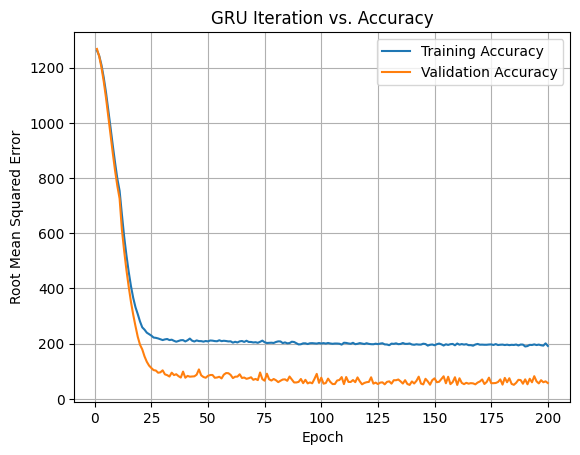

In [ ]:
import matplotlib.pyplot as plt

# # Get the training and validation accuracy values at each epoch
training_accuracy = gru_history.history['root_mean_squared_error']
validation_accuracy = gru_history.history['val_root_mean_squared_error']

# # Generate a list of iterations (epochs)
iterations = list(range(1, len(training_accuracy) + 1))

# Plot the iteration vs. accuracy graph
#plt.figure(figsize=(8, 6))
plt.plot(iterations, training_accuracy, label='Training Accuracy')
plt.plot(iterations, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.title('GRU Iteration vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Saving 3 Model's History**

In [ ]:
import pickle
# lstm_history, gru_history, transformer_history

# Create a dictionary to store the training histories of all three models
model_histories = {
    'lstm_history': lstm_history.history,
    'gru_history': gru_history.history,
    'transformer_history': transformer_history.history
}

# Save the model histories to a file using pickle
with open('model_histories.pkl', 'wb') as file:
  pickle.dump(model_histories, file)


**Load Model Histories**

In [ ]:
import pickle

# Load the model histories from the pickle file
with open('model_histories.pkl', 'rb') as file:
    model_histories = pickle.load(file)
lstm_history = model_histories['lstm_history']
gru_history = model_histories['gru_history']
transformer_history = model_histories['transformer_history']


**RMSE Vs Epoch plotting**

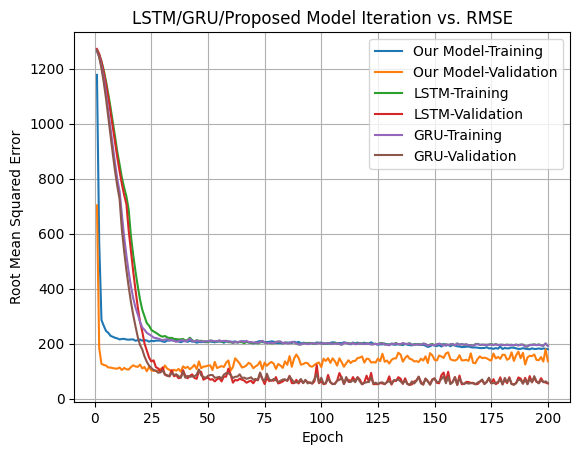

In [ ]:
import matplotlib.pyplot as plt

# # Get the training and validation accuracy values at each epoch
training_accuracy = transformer_history['root_mean_squared_error']
validation_accuracy = transformer_history['val_root_mean_squared_error']
# # Get the training and validation accuracy values at each epoch
lstm_training_accuracy = lstm_history['root_mean_squared_error']
lstm_validation_accuracy = lstm_history['val_root_mean_squared_error']
# # Get the training and validation accuracy values at each epoch
gru_training_accuracy = gru_history['root_mean_squared_error']
gru_validation_accuracy = gru_history['val_root_mean_squared_error']


# # Generate a list of iterations (epochs)
iterations = list(range(1, len(training_accuracy) + 1))

# Plot the iteration vs. accuracy graph
#plt.figure(figsize=(8, 6))
plt.plot(iterations, training_accuracy, label='Our Model-Training')
plt.plot(iterations, validation_accuracy, label='Our Model-Validation')
plt.plot(iterations, lstm_training_accuracy, label='LSTM-Training')
plt.plot(iterations, lstm_validation_accuracy, label='LSTM-Validation')
plt.plot(iterations, gru_training_accuracy, label='GRU-Training')
plt.plot(iterations, gru_validation_accuracy, label='GRU-Validation')

plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.title('LSTM/GRU/Proposed Model Iteration vs. RMSE')
plt.legend()
plt.grid(True)
plt.show()

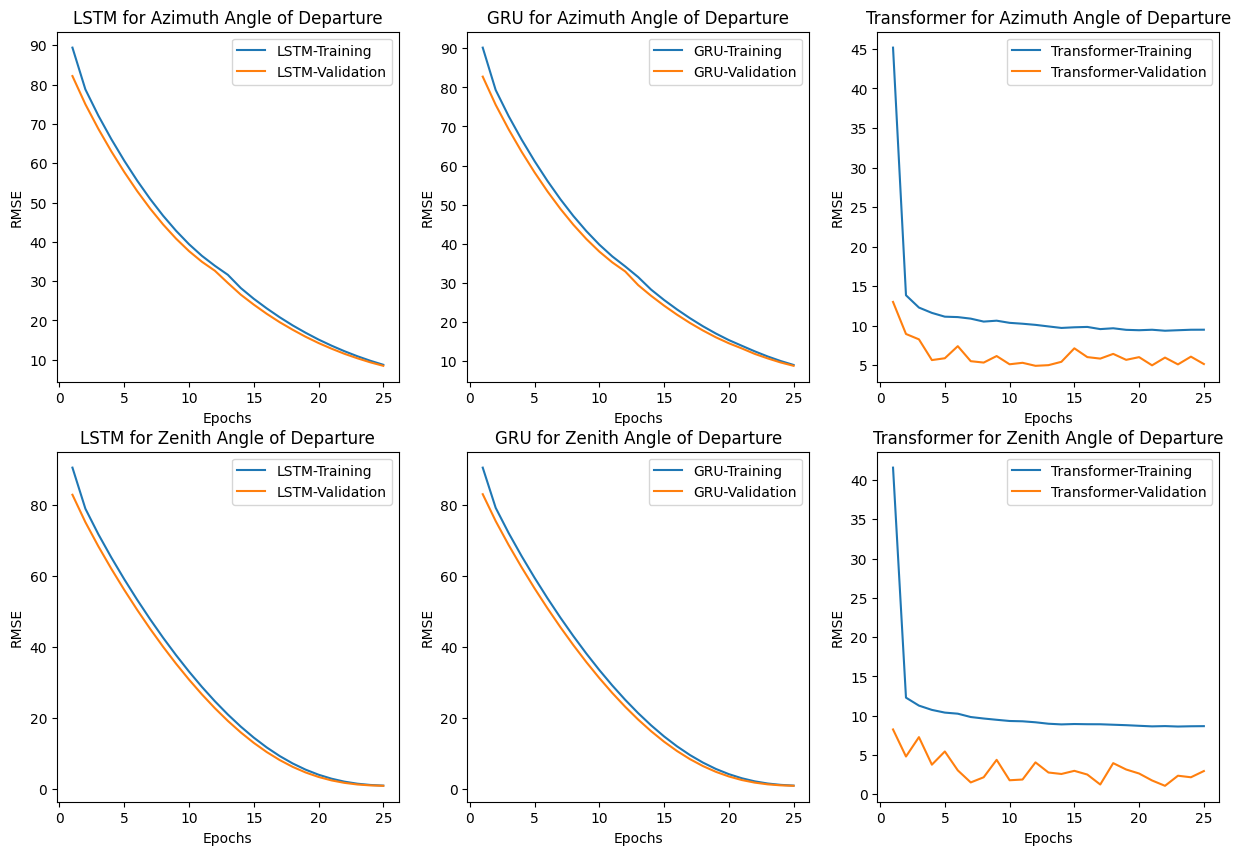

In [ ]:
# Generate a list of iterations (epochs)
epochs = list(range(1, len(model_histories_DoD_phi['lstm_history_DoD_phi']['root_mean_squared_error']) + 1))

# Create a function to plot epochs vs. RMSE for training and validation data
def plot_rmse(history, model_name, ax, feature_name):
    ax.plot(epochs, history['root_mean_squared_error'], label=f'{model_name}-Training')
    ax.plot(epochs, history['val_root_mean_squared_error'], label=f'{model_name}-Validation')
    ax.set_title(f'{model_name} for {feature_name}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('RMSE')
    ax.legend()


# Create a figure and axes for subplots using plt.subplots()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot LSTM history
plot_rmse(model_histories_DoD_phi['lstm_history_DoD_phi'], 'LSTM', axes[0, 0], 'Azimuth Angle of Departure')
# Plot GRU history
plot_rmse(model_histories_DoD_phi['gru_history_DoD_phi'], 'GRU', axes[0, 1], 'Azimuth Angle of Departure')
# Plot Transformer history
plot_rmse(model_histories_DoD_phi['transformer_history_DoD_phi'], 'Transformer', axes[0, 2], 'Azimuth Angle of Departure')

# Plot LSTM history
plot_rmse(model_histories_DoD_theta['lstm_history_DoD_theta'], 'LSTM', axes[1, 0], 'Zenith Angle of Departure')
# Plot GRU history
plot_rmse(model_histories_DoD_theta['gru_history_DoD_theta'], 'GRU', axes[1, 1], 'Zenith Angle of Departure')
# Plot Transformer history
plot_rmse(model_histories_DoD_theta['transformer_history_DoD_theta'], 'Transformer', axes[1, 2], 'Zenith Angle of Departure')


# **Prediction Function**

**Load Models**

In [ ]:
#from keras.models import load_model

#load models
lstm_model = tf.keras.models.load_model('lstm_model.h5')
gru_model = tf.keras.models.load_model('gru_model.h5')
transformer_model = tf.keras.models.load_model('transformer_model.h5')

In [ ]:
# def y_predictions(model, X, y):
#   predictions = model.predict(X).flatten()
#   df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
#   return df, predictions

In [ ]:
# df_comp_lstm, y_pred_lstm = y_predictions(lstm_model, X_test_scaled, y_test)
# df_comp_gru, y_pred_gru = y_predictions(gru_model, X_test_scaled, y_test)
# df_comp_transformer, y_pred_transformer = y_predictions(transformer_model, X_test_scaled, y_test)

In [ ]:
def y_predictions(model, X):
  predictions = model.predict(X)
  return predictions

In [ ]:
y_pred_lstm = y_predictions(lstm_model, X_test_scaled)
y_pred_gru = y_predictions(gru_model, X_test_scaled)
y_pred_transformer = y_predictions(transformer_model, X_test_scaled)

63/63 [==============================] - 1s 4ms/step


**start and end index**

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df'
startcol_name = "DoD_phi"
startInd = df.columns.get_loc(startcol_name)

endcol_name = "power"
endInd = df.columns.get_loc(endcol_name)

print(f"The column '{startcol_name}' is at index {startInd}")
print(f"The column '{endcol_name}' is at index {endInd}")


The column 'DoD_phi' is at index 9
The column 'power' is at index 15


**Overall RIS Beam's MAE, MSE, RMSE, R2-Score**

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Assuming y_test is your actual values for columns 9 to 15
y_actual = y_test[:, startInd:endInd+1]

# Extract the corresponding columns from predicted values
y_pred_lstm_subset = y_pred_lstm[:, startInd:endInd+1]
y_pred_gru_subset = y_pred_gru[:, startInd:endInd+1]
y_pred_transformer_subset = y_pred_transformer[:, startInd:endInd+1]

# Calculate evaluation metrics
mae_lstm = mean_absolute_error(y_actual, y_pred_lstm_subset)
mse_lstm = mean_squared_error(y_actual, y_pred_lstm_subset)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_actual, y_pred_lstm_subset)
explained_variance_score_lstm = explained_variance_score(y_actual, y_pred_lstm_subset)

mae_gru = mean_absolute_error(y_actual, y_pred_gru_subset)
mse_gru = mean_squared_error(y_actual, y_pred_gru_subset)
rmse_gru = np.sqrt(mse_gru)
r2_gru = r2_score(y_actual, y_pred_gru_subset)
explained_variance_score_gru = explained_variance_score(y_actual, y_pred_gru_subset)

mae_transformer = mean_absolute_error(y_actual, y_pred_transformer_subset)
mse_transformer = mean_squared_error(y_actual, y_pred_transformer_subset)
rmse_transformer = np.sqrt(mse_transformer)
r2_transformer = r2_score(y_actual, y_pred_transformer_subset)
explained_variance_score_transformer = explained_variance_score(y_actual, y_pred_transformer_subset)

# Print or use the calculated metrics
print("LSTM - MAE:", mae_lstm, "MSE:", mse_lstm, "RMSE:", rmse_lstm, "R2 score:", r2_lstm, "explained_variance:", explained_variance_score_lstm)
print("GRU - MAE:", mae_gru, "MSE:", mse_gru, "RMSE:", rmse_gru, "R2 score:", r2_gru, "explained_variance:", explained_variance_score_gru)
print("Transformer - MAE:", mae_transformer, "MSE:", mse_transformer, "RMSE:", rmse_transformer, "R2 score:", r2_transformer, "explained_variance:", explained_variance_score_transformer)


LSTM - MAE: 23.395047446809816 MSE: 1833.8707583742646 RMSE: 42.823717241433684 R2 score: -7.520947476571174e+18 explained_variance: -1856185408652399.8
GRU - MAE: 26.63569345050546 MSE: 2000.0078788484918 RMSE: 44.7214476381131 R2 score: -3.9905032010176534e+21 explained_variance: -7.821136317234889e+17
Transformer - MAE: 46.72355221269578 MSE: 3924.120430359547 RMSE: 62.6428003074539 R2 score: -3.203656729475826e+19 explained_variance: -1.6440108632185025e+19


**Single Column MAE, RMSE, R2**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics for each column
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

# for col in range(y_actual.shape[1]):
#     mae = mean_absolute_error(y_actual[:, col], y_pred_lstm_subset[:, col])
#     mse = mean_squared_error(y_actual[:, col], y_pred_lstm_subset[:, col])
#     rmse = mean_squared_error(y_actual[:, col], y_pred_lstm_subset[:, col], squared=False)
#     r2_score = r2_score(y_actual[:, col], y_pred_lstm_subset[:, col])

#     mae_scores.append(mae)
#     mse_scores.append(mse)
#     rmse_scores.append(rmse)
#     r2_scores.append(r2_score)

startcol_name = "LoS_bs"
startInd = df.columns.get_loc(startcol_name)

mae = mean_absolute_error(y_test[:, startInd], y_pred_transformer[:, startInd])
mse = mean_squared_error(y_test[:, startInd], y_pred_transformer[:, startInd])
rmse = mean_squared_error(y_test[:, startInd], y_pred_transformer[:, startInd], squared=False)
r2 = r2_score(y_test[:, startInd], y_pred_transformer[:, startInd])

# Print or visualize the scores
print("MAE Scores:", mae)
print("MSE Scores:", mse)
print("RMSE Scores:", rmse)
print("R2 Scores:", r2)


MAE Scores: 0.7610365992730802
MSE Scores: 0.697999609221491
RMSE Scores: 0.8354637090990195
R2 Scores: 0.06267459292979372


**Prediction values for 3 Models**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# DoD_phi, DoD_phi, DoD_phi
col_dodphi = "DoD_phi"
col_dodphi = df.columns.get_loc(col_dodphi)
# Extract the data from columns: DoD_phi
y_test_dodphi = y_test[:, col_dodphi]
y_pred_dodphi_lstm = y_pred_lstm[:, col_dodphi]
y_pred_dodphi_gru = y_pred_gru[:, col_dodphi]
y_pred_dodphi_tr = y_pred_transformer[:, col_dodphi]


# DoD_theta, DoD_theta, DoD_theta
col_dodtheta = "DoD_theta"
col_dodtheta = df.columns.get_loc(col_dodtheta)
# Extract the data from columns: DoD_theta
y_test_dodtheta = y_test[:, col_dodtheta]
y_pred_dodtheta_lstm = y_pred_lstm[:, col_dodtheta]
y_pred_dodtheta_gru = y_pred_gru[:, col_dodtheta]
y_pred_dodtheta_tr = y_pred_transformer[:, col_dodtheta]


# DoA_phi, DoA_phi, DoA_phi
col_doaphi = "DoA_phi"
col_doaphi = df.columns.get_loc(col_doaphi)
# Extract the data from columns: DoA_phi
y_test_doaphi = y_test[:, col_doaphi]
y_pred_doaphi_lstm = y_pred_lstm[:, col_doaphi]
y_pred_doaphi_gru = y_pred_gru[:, col_doaphi]
y_pred_doaphi_tr = y_pred_transformer[:, col_doaphi]


# DoA_theta, DoA_theta, DoA_theta
col_doatheta = "DoA_theta"
col_doatheta = df.columns.get_loc(col_doatheta)
# Extract the data from columns: DoD_theta
y_test_doatheta = y_test[:, col_doatheta]
y_pred_doatheta_lstm = y_pred_lstm[:, col_doatheta]
y_pred_doatheta_gru = y_pred_gru[:, col_doatheta]
y_pred_doatheta_tr = y_pred_transformer[:, col_doatheta]


# ToA, ToA, ToA
col_toa = "ToA"
col_toa = df.columns.get_loc(col_toa)
# Extract the data from columns: ToA
y_test_toa = y_test[:, col_toa]
y_pred_toa_lstm = y_pred_lstm[:, col_toa]
y_pred_toa_gru = y_pred_gru[:, col_toa]
y_pred_toa_tr = y_pred_transformer[:, col_toa]


# power, power, power
col_power = "power"
col_power = df.columns.get_loc(col_power)
# Extract the data from columns: power
y_test_pow = y_test[:, col_power]
y_pred_pow_lstm = y_pred_lstm[:, col_power]
y_pred_pow_gru = y_pred_gru[:, col_power]
y_pred_pow_tr = y_pred_transformer[:, col_power]



################################## TESTING PLOT ##############################
# Create a plot
#plt.figure(figsize=(10, 6))
plt.plot(y_test_pow, label='Actual Value')
plt.plot(y_pred_pow_gru, label='Model')

# Add labels and title
plt.xlabel('Sequence Number')
plt.ylabel('watts')
plt.title('Prediction of power')
plt.legend()
# Show the plot
plt.show()


**Plotting Prediction values**

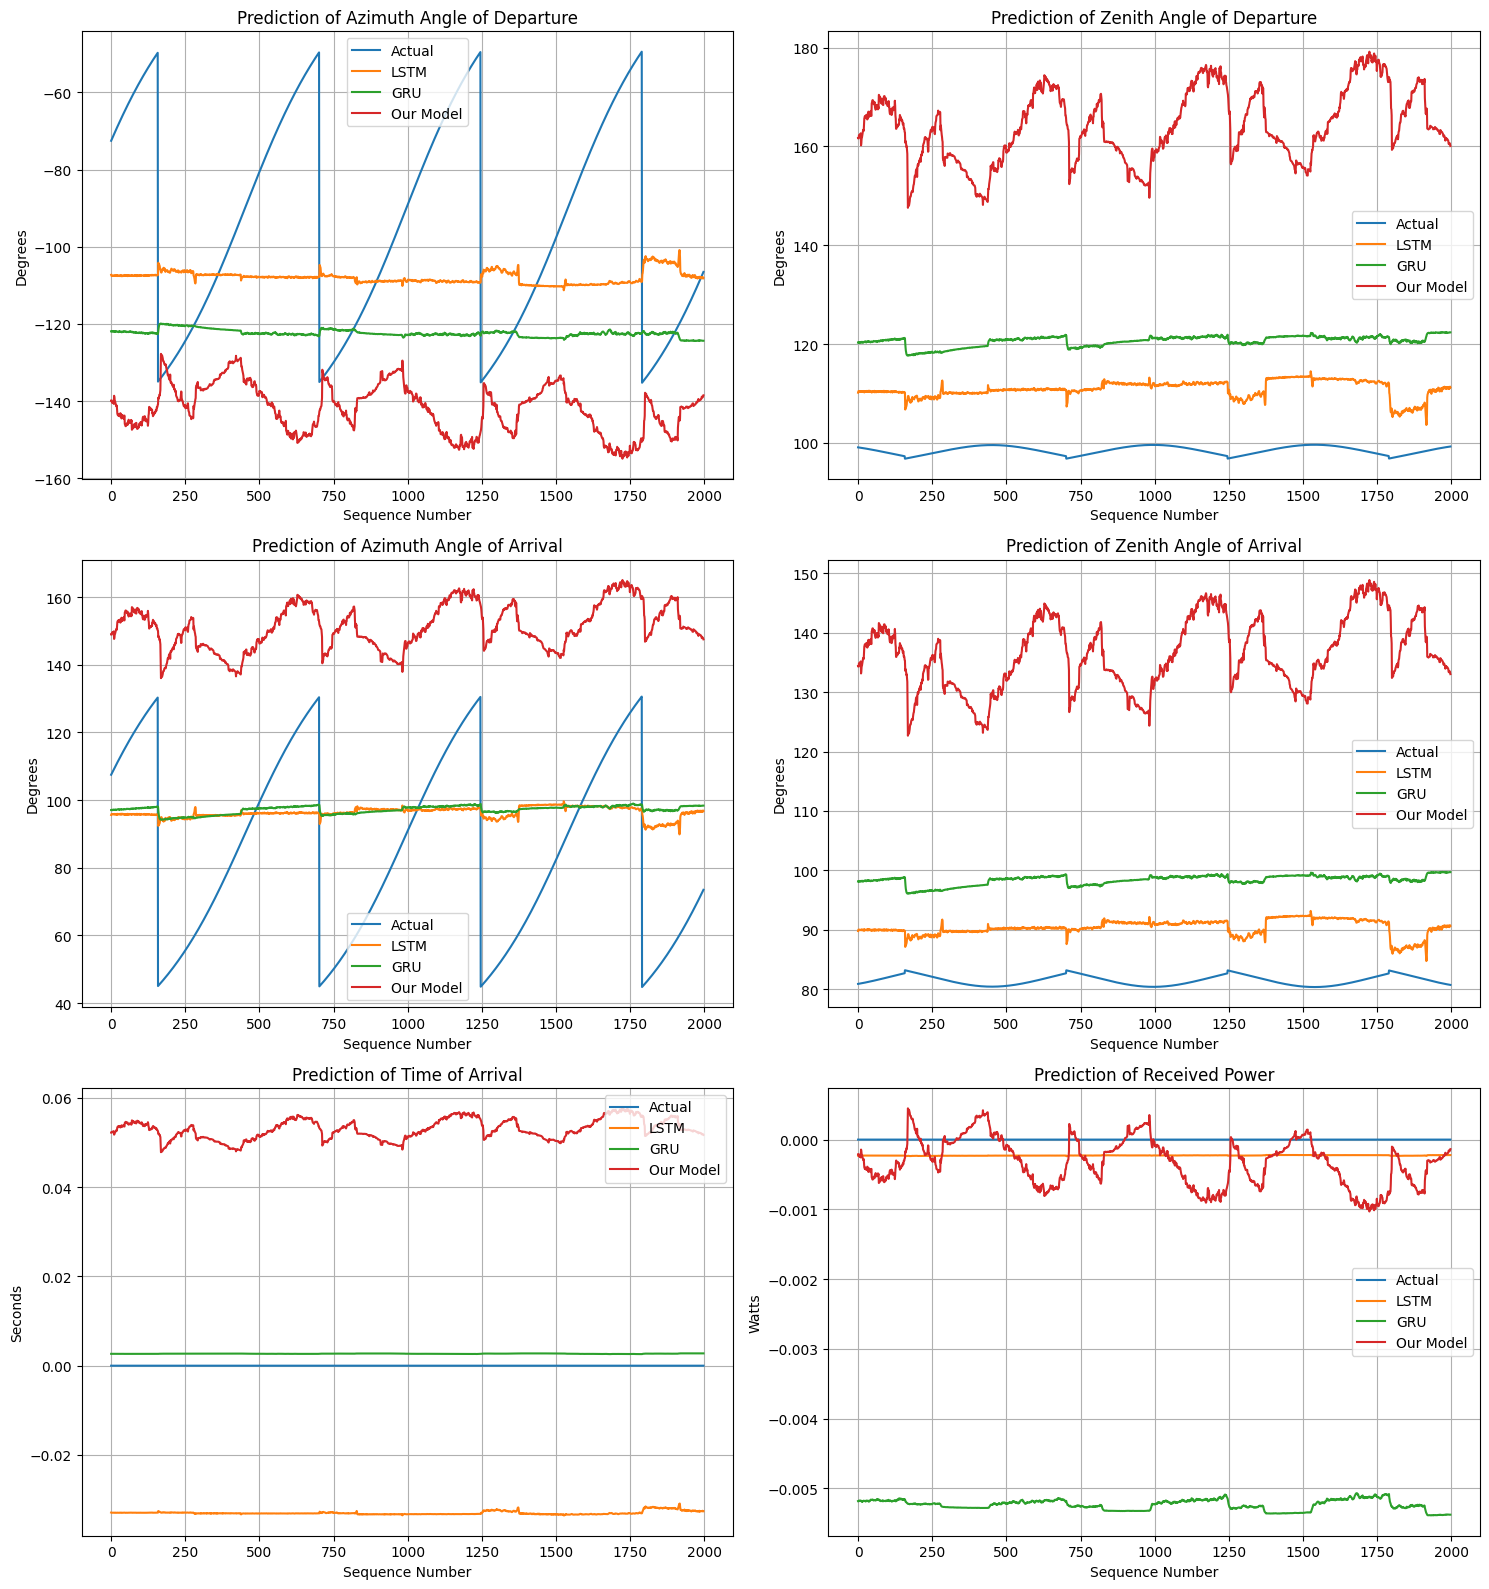

In [ ]:
# Create subplots and plot RMSE values
fig, axs = plt.subplots(3, 2, figsize=(15, 16))

# Plot prediction for dod_phi
axs[0, 0].plot(y_test_dodphi, label='Actual')
axs[0, 0].plot(y_pred_dodphi_lstm, label='LSTM')
axs[0, 0].plot(y_pred_dodphi_gru, label='GRU')
axs[0, 0].plot(y_pred_dodphi_tr, label='Our Model')
axs[0, 0].set_title('Prediction of Azimuth Angle of Departure')
axs[0, 0].set_xlabel('Sequence Number')
axs[0, 0].set_ylabel('Degrees')
axs[0, 0].legend()
axs[0, 0].grid()


# Plot prediction for dod_theta
axs[0, 1].plot(y_test_dodtheta, label='Actual')
axs[0, 1].plot(y_pred_dodtheta_lstm, label='LSTM')
axs[0, 1].plot(y_pred_dodtheta_gru, label='GRU')
axs[0, 1].plot(y_pred_dodtheta_tr, label='Our Model')
axs[0, 1].set_title('Prediction of Zenith Angle of Departure')
axs[0, 1].set_xlabel('Sequence Number')
axs[0, 1].set_ylabel('Degrees')
axs[0, 1].legend()
axs[0, 1].grid()


# Plot prediction for dod_phi
axs[1, 0].plot(y_test_doaphi, label='Actual')
axs[1, 0].plot(y_pred_doaphi_lstm, label='LSTM')
axs[1, 0].plot(y_pred_doaphi_gru, label='GRU')
axs[1, 0].plot(y_pred_doaphi_tr, label='Our Model')
axs[1, 0].set_title('Prediction of Azimuth Angle of Arrival')
axs[1, 0].set_xlabel('Sequence Number')
axs[1, 0].set_ylabel('Degrees')
axs[1, 0].legend()
axs[1, 0].grid()


# Plot prediction for dod_theta
axs[1, 1].plot(y_test_doatheta, label='Actual')
axs[1, 1].plot(y_pred_doatheta_lstm, label='LSTM')
axs[1, 1].plot(y_pred_doatheta_gru, label='GRU')
axs[1, 1].plot(y_pred_doatheta_tr, label='Our Model')
axs[1, 1].set_title('Prediction of Zenith Angle of Arrival')
axs[1, 1].set_xlabel('Sequence Number')
axs[1, 1].set_ylabel('Degrees')
axs[1, 1].legend()
axs[1, 1].grid()


# Plot prediction for ToA
axs[2, 0].plot(y_test_toa, label='Actual')
axs[2, 0].plot(y_pred_toa_lstm, label='LSTM')
axs[2, 0].plot(y_pred_toa_gru, label='GRU')
axs[2, 0].plot(y_pred_toa_tr, label='Our Model')
axs[2, 0].set_title('Prediction of Time of Arrival')
axs[2, 0].set_xlabel('Sequence Number')
axs[2, 0].set_ylabel('Seconds')
axs[2, 0].legend()
axs[2, 0].grid()

# Plot prediction for power
axs[2, 1].plot(y_test_pow, label='Actual')
axs[2, 1].plot(y_pred_pow_lstm, label='LSTM')
axs[2, 1].plot(y_pred_pow_gru, label='GRU')
axs[2, 1].plot(y_pred_pow_tr, label='Our Model')
axs[2, 1].set_title('Prediction of Received Power')
axs[2, 1].set_xlabel('Sequence Number')
axs[2, 1].set_ylabel('Watts')
axs[2, 1].legend()
axs[2, 1].grid()


plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have a DataFrame called 'df'
column_name = "column_name_to_evaluate"
actual_values = df['actual_column_name']  # Replace 'actual_column_name' with the actual column containing true values
predicted_values = df[column_name]

# Calculate metrics
mse = mean_squared_error(actual_values, predicted_values)
mae = mean_absolute_error(actual_values, predicted_values)
rmse = mean_squared_error(actual_values, predicted_values, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(actual_values, predicted_values)

print(f"Metrics for '{column_name}':")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


**making y_test to a DataFrame and selecting columns**

In [ ]:
# Assuming y_test is 1998x21 NumPy array
y_test_df = pd.DataFrame(y_test)
selected_columns_df = y_test_df.iloc[:, 9:16]

# reset the column names to start from 10
selected_columns_df.columns = df.columns[9: 16]
selected_columns_df

,DoD_phi,DoD_theta,DoA_phi,DoA_theta,phase,ToA,power
0,-61.6223,98.3051,118.3780,81.6949,-115.3230,9.240000e-07,1.420000e-13
1,-118.6970,98.1190,61.3035,81.8810,-92.1995,9.450000e-07,1.350000e-13
2,-69.7536,98.8478,110.2460,81.1522,47.1840,8.680000e-07,1.640000e-13
3,-62.1065,98.1268,117.8940,81.8732,35.1292,9.440000e-07,1.360000e-13
4,-119.5370,98.1869,60.4635,81.8131,10.0814,9.370000e-07,1.380000e-13
...,...,...,...,...,...,...,...
1993,-63.0555,98.4412,116.9450,81.5588,101.0380,9.090000e-07,1.480000e-13
1994,-104.5500,99.2455,75.4499,80.7545,130.0890,8.310000e-07,1.810000e-13
1995,-118.2810,98.2579,61.7186,81.7421,-70.6193,9.290000e-07,1.410000e-13
1996,-76.4773,99.0148,103.5230,80.9852,108.6220,8.520000e-07,1.710000e-13


In [ ]:
y_actual = y_test[:, startInd:endInd+1]
pd.DataFrame(y_actual)

,0,1,2,3,4,5,6
0,-61.6223,98.3051,118.3780,81.6949,-115.3230,9.240000e-07,1.420000e-13
1,-118.6970,98.1190,61.3035,81.8810,-92.1995,9.450000e-07,1.350000e-13
2,-69.7536,98.8478,110.2460,81.1522,47.1840,8.680000e-07,1.640000e-13
3,-62.1065,98.1268,117.8940,81.8732,35.1292,9.440000e-07,1.360000e-13
4,-119.5370,98.1869,60.4635,81.8131,10.0814,9.370000e-07,1.380000e-13
...,...,...,...,...,...,...,...
1993,-63.0555,98.4412,116.9450,81.5588,101.0380,9.090000e-07,1.480000e-13
1994,-104.5500,99.2455,75.4499,80.7545,130.0890,8.310000e-07,1.810000e-13
1995,-118.2810,98.2579,61.7186,81.7421,-70.6193,9.290000e-07,1.410000e-13
1996,-76.4773,99.0148,103.5230,80.9852,108.6220,8.520000e-07,1.710000e-13


# **Ploting R2, RMSE, MAE etc.**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming you have predictions for each model stored in `y_pred_transformer`, `y_pred_lstm`, and `y_pred_gru`

# R2 Score
r2_transformer = r2_score(y_test, y_pred_transformer)
r2_lstm = r2_score(y_test, y_pred_lstm)
r2_gru = r2_score(y_test, y_pred_gru)

# Root Mean Squared Error (RMSE)
rmse_transformer = mean_squared_error(y_test, y_pred_transformer, squared=False)
rmse_lstm = mean_squared_error(y_test, y_pred_lstm, squared=False)
rmse_gru = mean_squared_error(y_test, y_pred_gru, squared=False)

# Mean Absolute Error (MAE)
mae_transformer = mean_absolute_error(y_test, y_pred_transformer)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)


**Score saving in CSV file**

In [ ]:
# Create lists for the model names and scores
models = ['Transformer', 'LSTM', 'GRU']
r2_scores = [r2_transformer, r2_lstm, r2_gru]
rmse_scores = [rmse_transformer, rmse_lstm, rmse_gru]
mae_scores = [mae_transformer, mae_lstm, mae_gru]

# Create a dictionary to store the scores
data_score = {
    'Model': models,
    'R2 Score': r2_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores
}

# Create a DataFrame from the data
scores_df = pd.DataFrame(data_score)

# Save the DataFrame to a CSV file
scores_df.to_csv('power.csv', index=False)

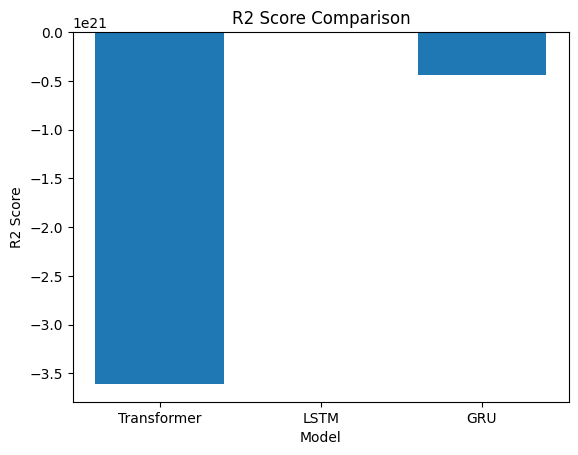

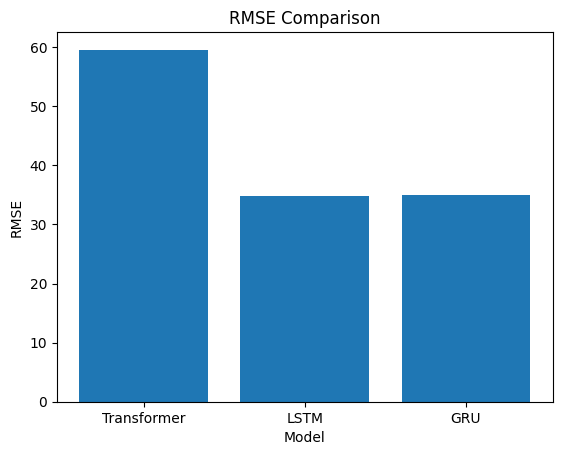

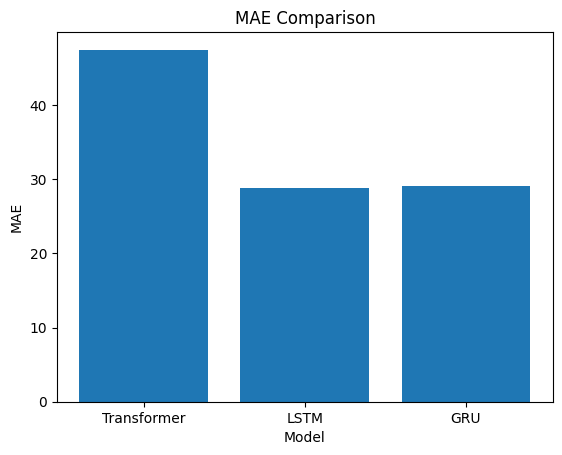

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the metrics for plotting
models = ['Transformer', 'LSTM', 'GRU']
r2_scores = [r2_transformer, r2_lstm, r2_gru]
rmse_scores = [rmse_transformer, rmse_lstm, rmse_gru]
mae_scores = [mae_transformer, mae_lstm, mae_gru]

# Bar plot for R2 scores
#plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')
#plt.ylim([0.85, 1.02])  # Set appropriate y-axis limits for R2 score (0 to 1)
plt.show()

# Bar plot for RMSE scores
#plt.figure(figsize=(8, 6))
plt.bar(models, rmse_scores)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.show()

# Bar plot for MAE scores
#plt.figure(figsize=(8, 6))
plt.bar(models, mae_scores)
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE Comparison')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

def plot_predictions(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])

  return df, mse(y, predictions)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')

# Assuming you have predictions for each model stored in `y_pred_transformer`, `y_pred_lstm`, and `y_pred_gru`
plt.plot(y_pred_transformer, label='Transformer')
plt.plot(y_pred_lstm, label='LSTM')
plt.plot(y_pred_gru, label='GRU')

plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('power Predicted Values Comparison')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')

# Assuming you have predictions for each model stored in `y_pred_transformer`, `y_pred_lstm`, and `y_pred_gru`
plt.plot(y_pred_transformer, label='Transformer')
plt.plot(y_pred_lstm, label='LSTM')
plt.plot(y_pred_gru, label='GRU')

plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('power Predicted Values Comparison')
plt.legend()

# Set x-axis limits for zoomed view
plt.xlim(250, 500)

plt.show()


# **load and save models**

**general load and save models**

In [ ]:
from keras.models import load_model

#load models
lstm_model_load = load_model('LSTM_model/')
gru_model_load = load_model('GRU_model/')
transformer_model_load = load_model('Transformer_model/')

# Save the model to a file
lstm_model_load.save('/content/SavedModels/lstm_model.h5')
gru_model_load.save('/content/SavedModels/gru_model.h5')
transformer_model_load.save('/content/SavedModels/transformer_model.h5')


In [ ]:
#load models
lstm_model_DoD_phi = load_model('LSTM_model/')
gru_model_DoD_phi = load_model('GRU_model/')
transformer_model_DoD_phi = load_model('Transformer_model/')

# Save the model to a file
lstm_model_DoD_phi.save('/content/SavedModels/lstm_model_DoD_phi.h5')
gru_model_DoD_phi.save('/content/SavedModels/gru_model_DoD_phi.h5')
transformer_model_DoD_phi.save('/content/SavedModels/transformer_model_DoD_phi.h5')


In [ ]:
#load
lstm_model_DoD_theta = load_model('LSTM_model_DoD_theta/')
gru_model_DoD_theta = load_model('GRU_model_DoD_theta/')
transformer_model_DoD_theta = load_model('Transformer_model_DoD_theta/')

#save
lstm_model_DoD_theta.save('/content/SavedModels/lstm_model_DoD_theta.h5')
gru_model_DoD_theta.save('/content/SavedModels/gru_model_DoD_theta.h5')
transformer_model_DoD_theta.save('/content/SavedModels/transformer_model_DoD_theta.h5')

In [ ]:
#load
lstm_model_DoA_theta = load_model('LSTM_model_DoA_theta/')
gru_model_DoA_theta = load_model('GRU_model_DoA_theta/')
transformer_model_DoA_theta = load_model('Transformer_model_DoA_theta/')

#save
lstm_model_DoA_theta.save('/content/SavedModels/lstm_model_DoA_theta.h5')
gru_model_DoA_theta.save('/content/SavedModels/gru_model_DoA_theta.h5')
transformer_model_DoA_theta.save('/content/SavedModels/transformer_model_DoA_theta.h5')

In [ ]:
#load
lstm_model_DoA_phi = load_model('LSTM_model_DoA_phi/')
gru_model_DoA_phi = load_model('GRU_model_DoA_phi/')
transformer_model_DoA_phi = load_model('Transformer_model_DoA_phi/')

#save
lstm_model_DoA_phi.save('/content/SavedModels/lstm_model_DoA_phi.h5')
gru_model_DoA_phi.save('/content/SavedModels/gru_model_DoA_phi.h5')
transformer_model_DoA_phi.save('/content/SavedModels/transformer_model_DoA_phi.h5')

In [ ]:
#load
lstm_model_ToA = load_model('LSTM_model_ToA/')
gru_model_ToA = load_model('GRU_model_ToA/')
transformer_model_ToA = load_model('Transformer_model_ToA/')

#save
lstm_model_ToA.save('/content/SavedModels/lstm_model_ToA.h5')
gru_model_ToA.save('/content/SavedModels/gru_model_ToA.h5')
transformer_model_ToA.save('/content/SavedModels/transformer_model_ToA.h5')

In [ ]:
#load
lstm_model_phase = load_model('LSTM_model_phase/')
gru_model_phase = load_model('GRU_model_phase/')
transformer_model_phase = load_model('Transformer_model_phase/')

#save
lstm_model_phase.save('/content/SavedModels/lstm_model_phase.h5')
gru_model_phase.save('/content/SavedModels/gru_model_phase.h5')
transformer_model_phase.save('/content/SavedModels/transformer_model_phase.h5')

In [ ]:
#load
lstm_model_power = load_model('LSTM_model_power/')
gru_model_power = load_model('GRU_model_power/')
transformer_model_power = load_model('Transformer_model_power/')

#save
lstm_model_power.save('/content/SavedModels/lstm_model_power.h5')
gru_model_power.save('/content/SavedModels/gru_model_power.h5')
transformer_model_power.save('/content/SavedModels/transformer_model_power.h5')